# Imports and Configs

In [67]:
# --- Basic Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *
from scipy.stats import chi2_contingency

# --- Theme & custom accent color ---
sns.set_theme(style="whitegrid", palette="mako")
ACCENT_COLOR = "#2ab7ca"
SECOND_COLOR = "#0d3b66"  # deep blue for target comparison

# --- Create Figures Directory ---
FIG_DIR = "../reports/figures/"
os.makedirs(FIG_DIR, exist_ok=True)

# Exploratory Data Analysis

## Dataset Exploration

### Load Dataset

In [40]:
# --- Load Dataset ---
df = pd.read_csv("../data/01-bronze/bank-additional-full.csv", sep=";")
df.columns = [normalizeString(colname) for colname in df.columns]
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Describe Dataset

In [41]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41188  41188       41188  ...  41188.000000  41188.000000   
unique      3         2     10           5  ...           NaN           NaN   
top        no  cellular    may         thu  ...           NaN           NaN   
freq    33950     26144  13769        8623  ...           NaN           NaN   
mean      NaN       NaN    NaN         NaN  ...      2.567593    962.475454   
std       NaN       NaN    NaN         NaN  ...      2.770014    186.910907   
min       NaN       NaN    NaN         NaN  ...      1.000000      0.000000   
25%       NaN       NaN    NaN         NaN  ...      1.000000    999.000000   
50%       NaN       NaN    NaN         NaN  ...      2.000000    999.000000   
75%       NaN       NaN    NaN         NaN  ...      3.000000    999.000000   
max       NaN       NaN    NaN         NaN  ...     56.000000    999.000000   

            previous     poutcome  emp_var_rate  cons_price_idx  \
count   41188.000000        41188  41188.000000    41188.000000   
unique           NaN            3           NaN             NaN   
top              NaN  nonexistent           NaN             NaN   
freq             NaN        35563           NaN             NaN   
mean        0.172963          NaN      0.081886       93.575664   
std         0.494901          NaN      1.570960        0.578840   
min         0.000000          NaN     -3.400000       92.201000   
25%         0.000000          NaN     -1.800000       93.075000   
50%         0.000000          NaN      1.100000       93.749000   
75%         0.000000          NaN      1.400000       93.994000   
max         7.000000          NaN      1.400000       94.767000   

        cons_conf_idx     euribor3m   nr_employed      y  
count    41188.000000  41188.000000  41188.000000  41188  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36548  
mean       -40.502600      3.621291   5167.035911    NaN  
std          4.628198      1.734447     72.251528    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN  

[11 rows x 21 columns]

### Identify and Separate Numeric and Categorical Variables

In [42]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp_var_rate',
  'cons_price_idx',
  'cons_conf_idx',
  'euribor3m',
  'nr_employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'])

## Feature Exploration

### Numerical Feature Distributions

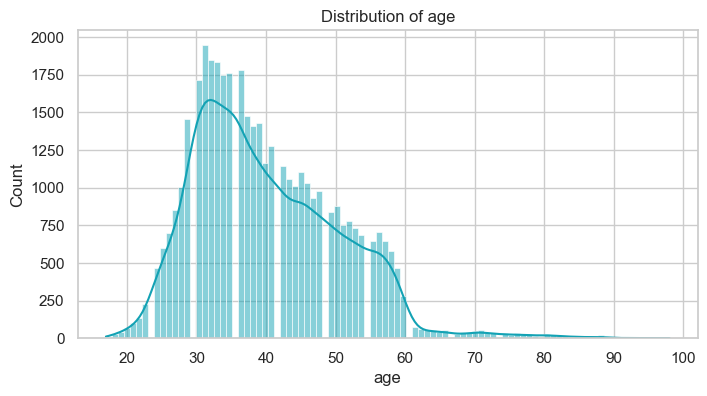

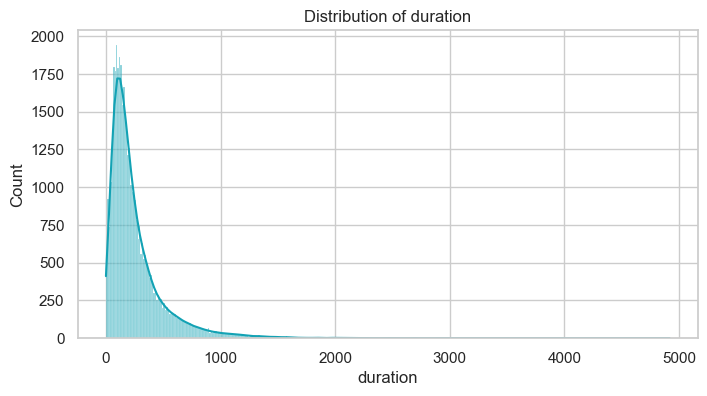

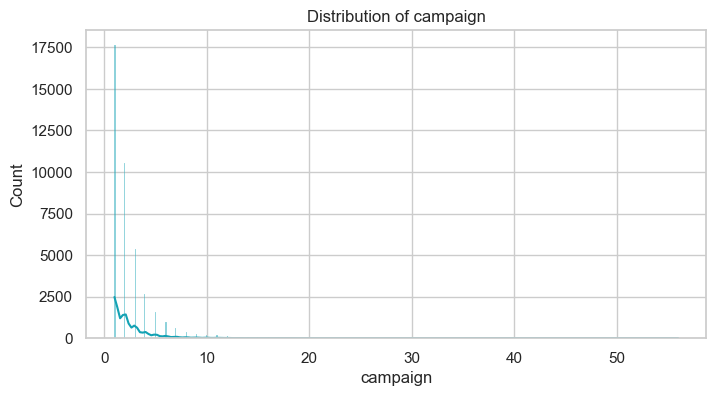

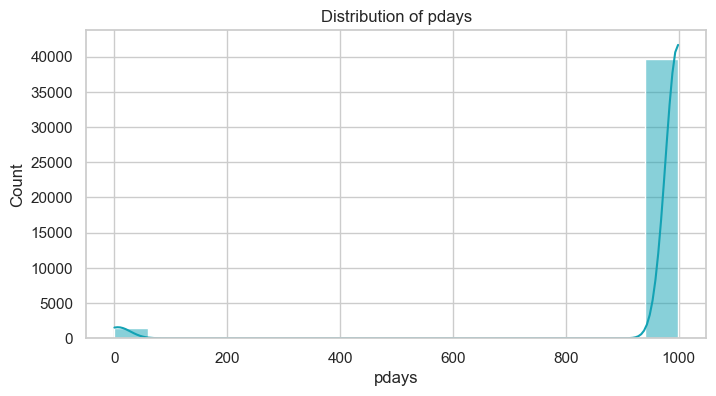

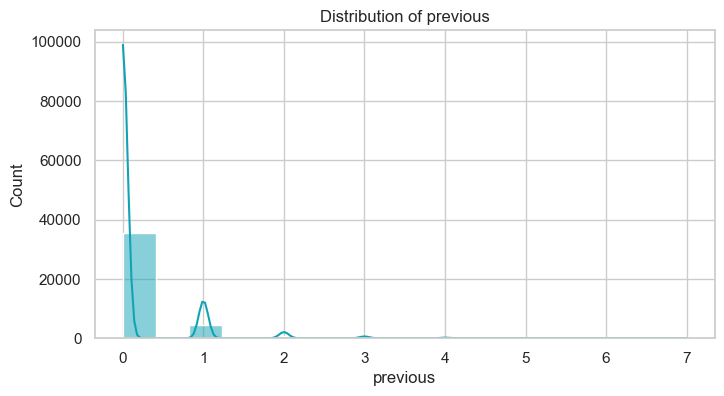

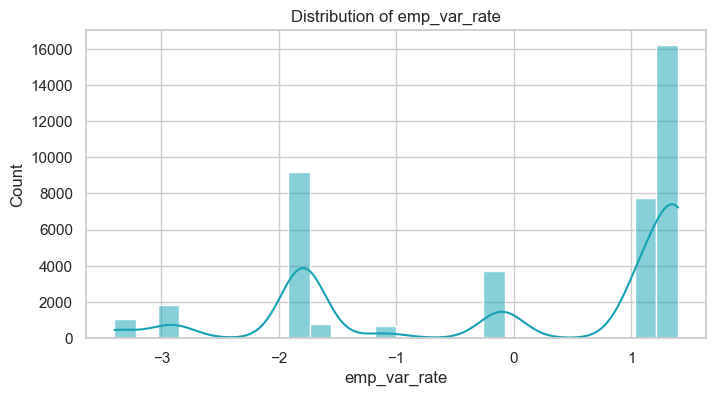

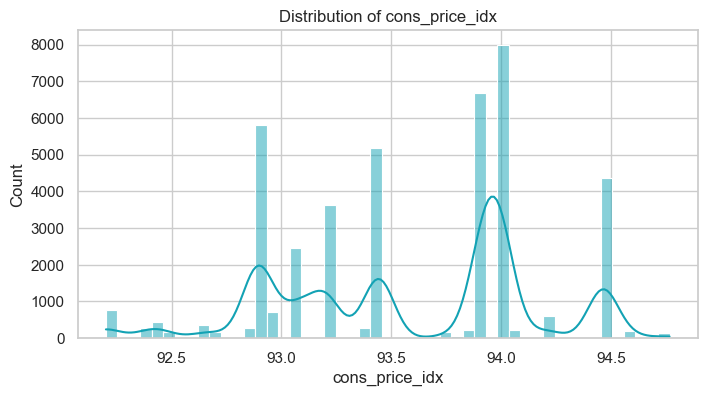

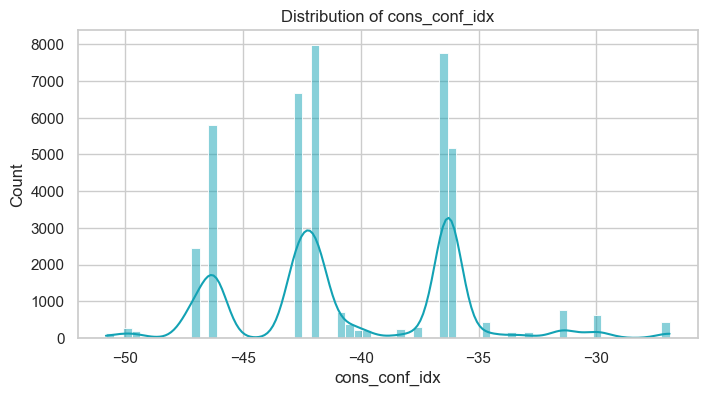

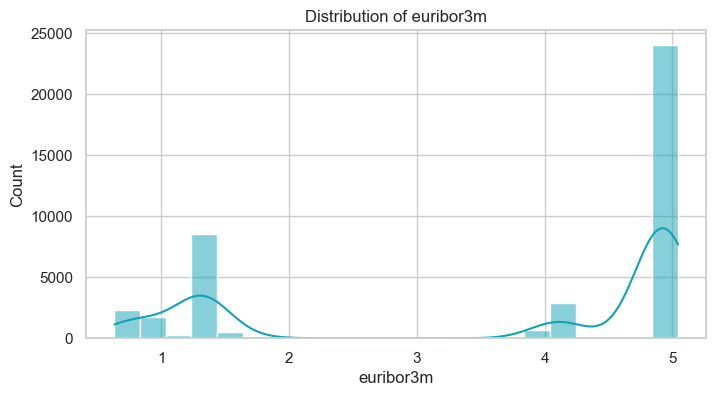

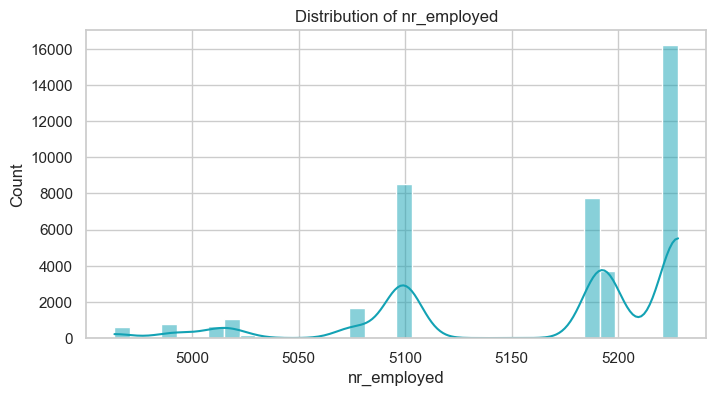

In [43]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True,
                  color=ACCENT_COLOR)
    plt.title(f"Distribution of {col}")

    plt.savefig(f"{FIG_DIR}{col}_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()

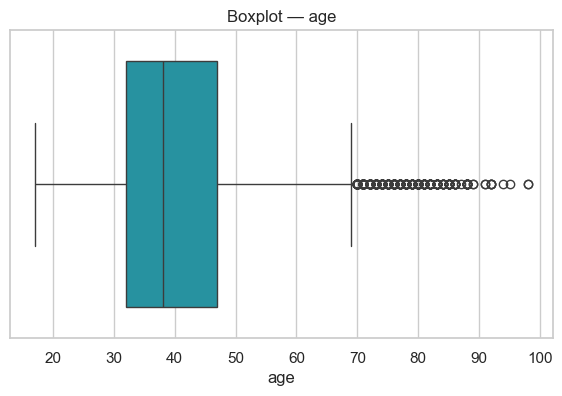

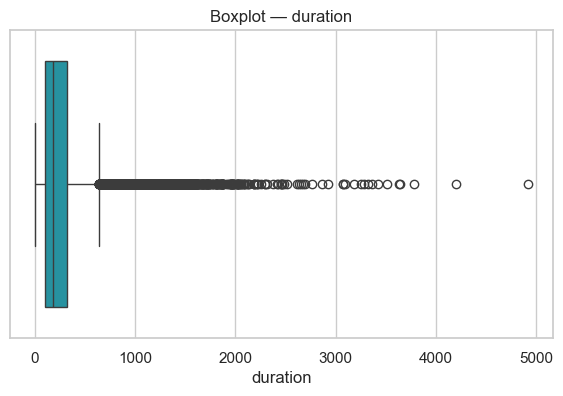

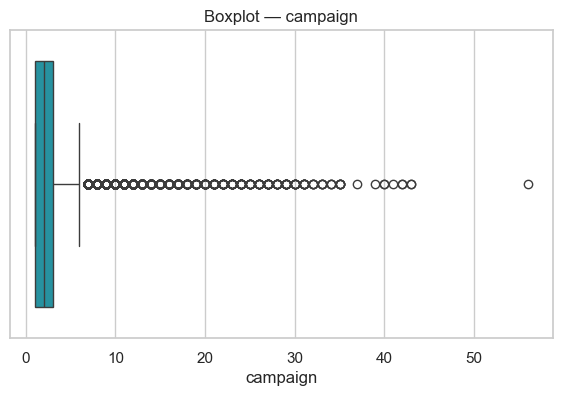

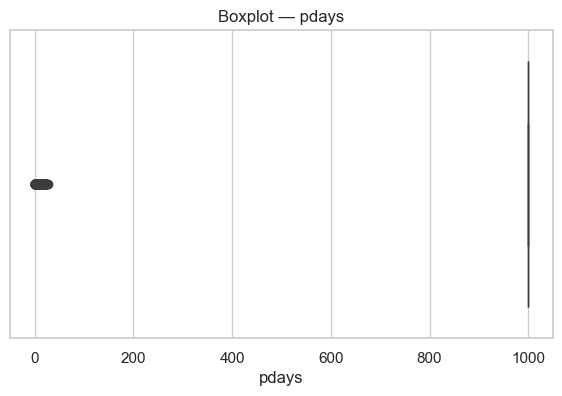

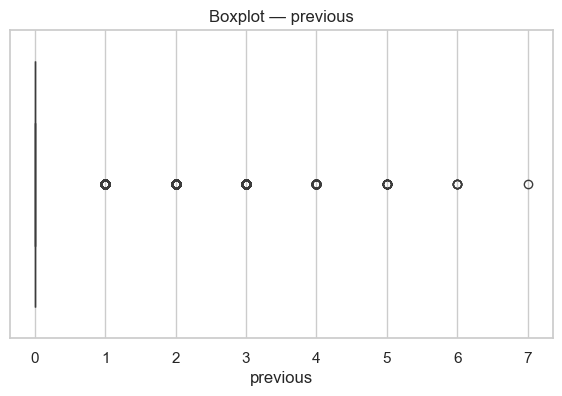

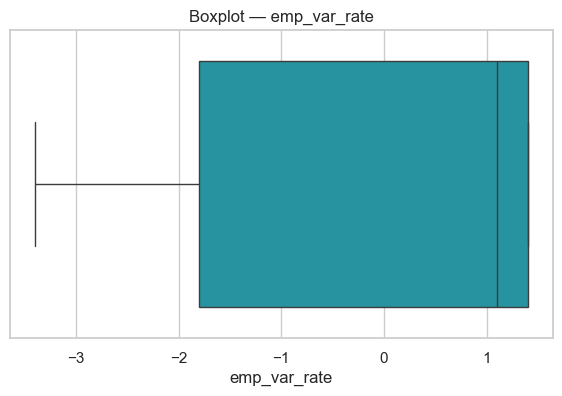

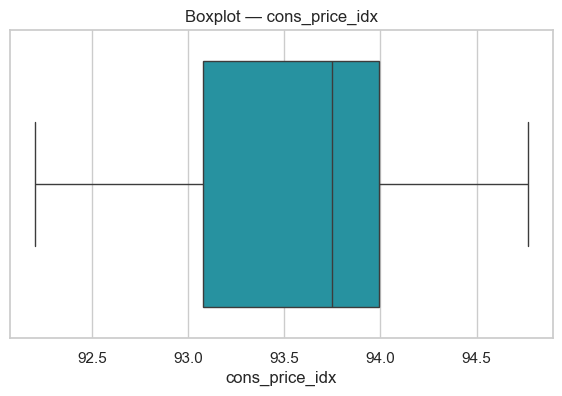

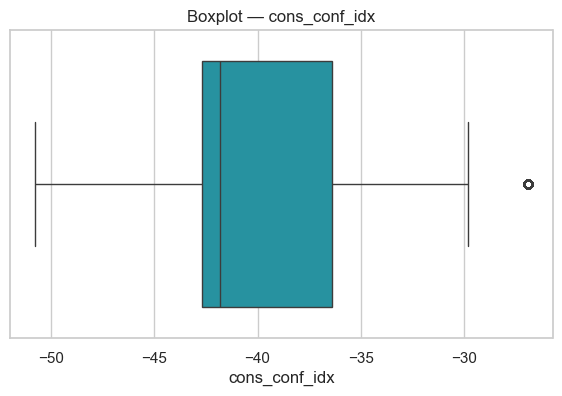

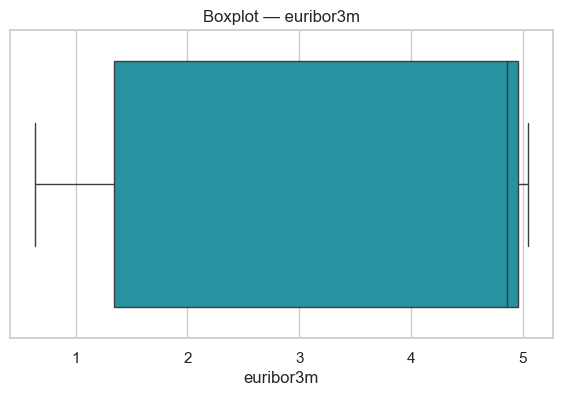

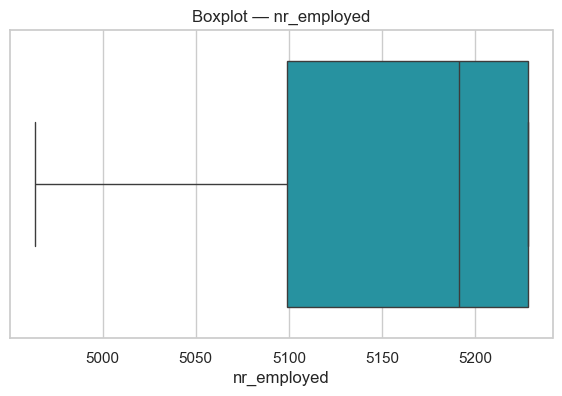

In [44]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col],
                  color=ACCENT_COLOR)
    plt.title(f"Boxplot — {col}")

    plt.savefig(f"{FIG_DIR}{col}_boxplot.png", dpi=300, bbox_inches="tight")
    plt.show()

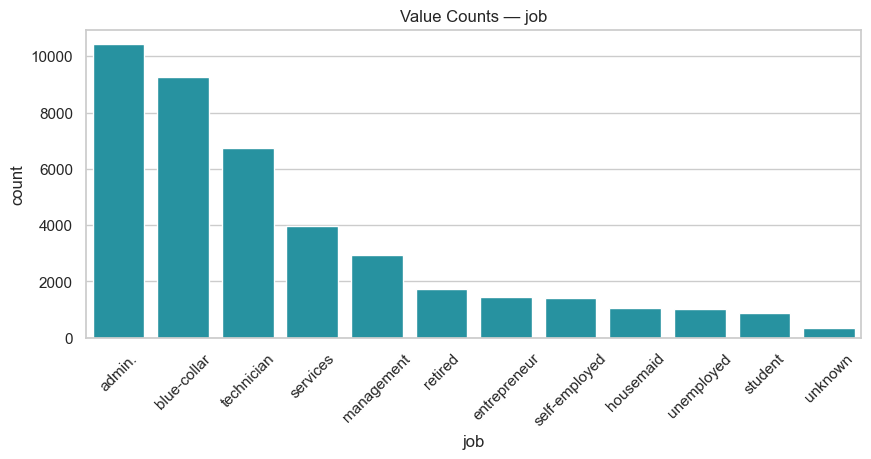

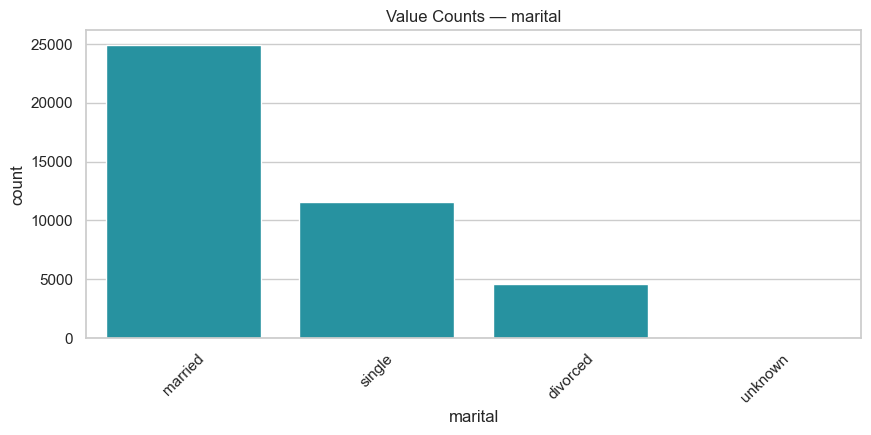

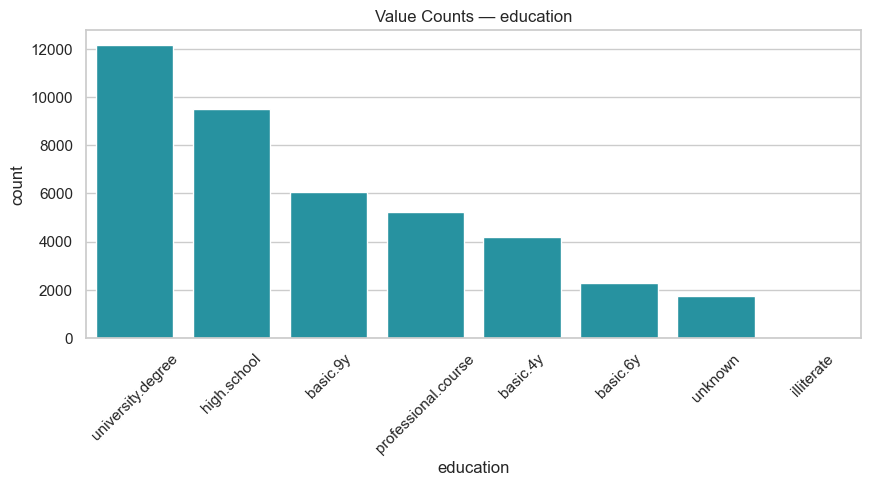

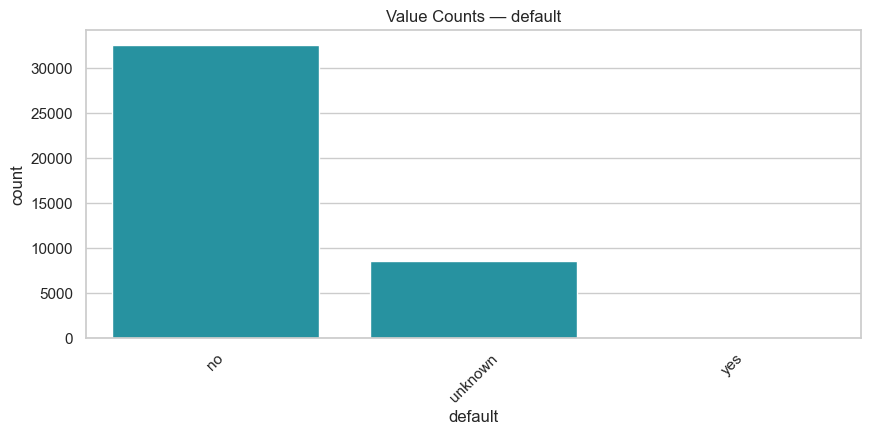

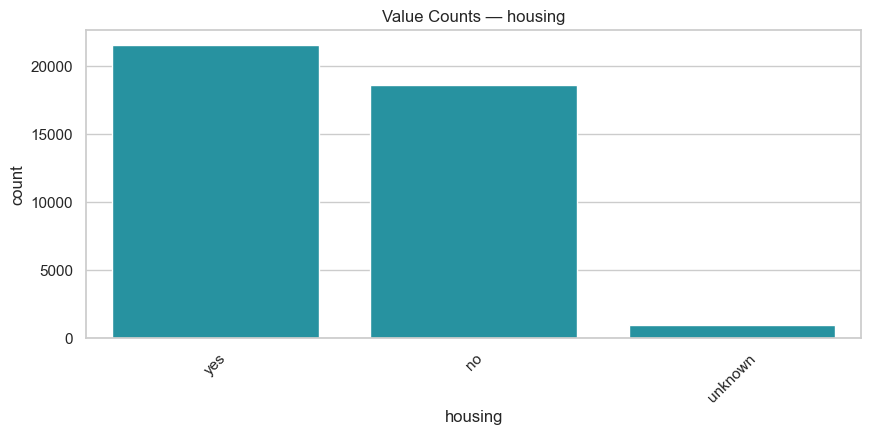

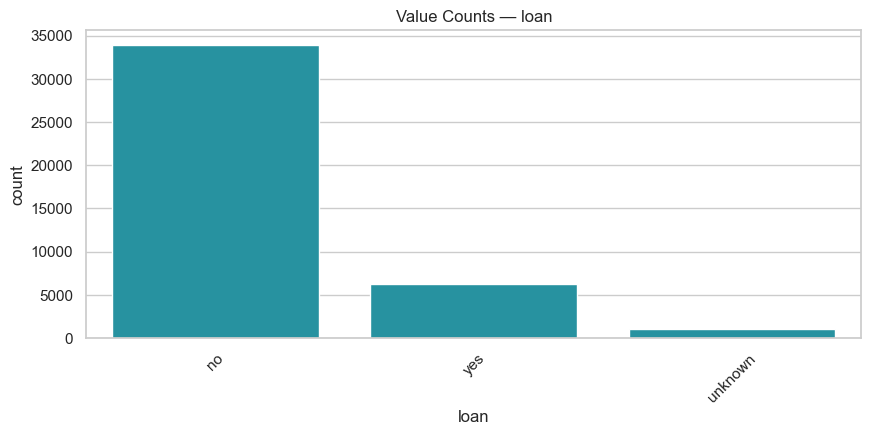

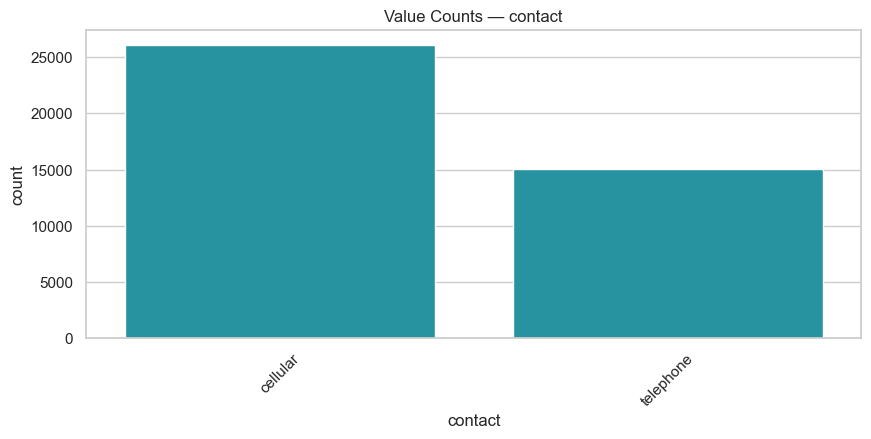

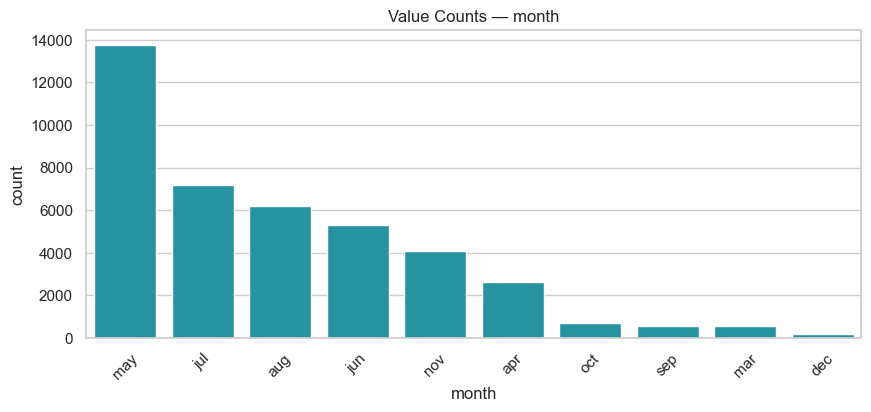

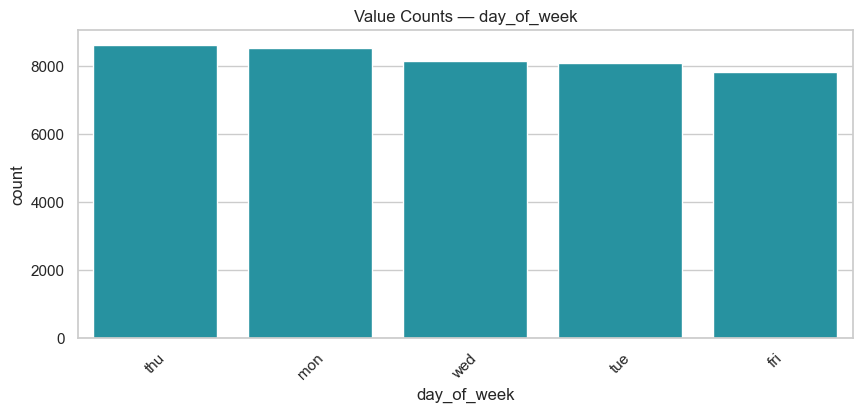

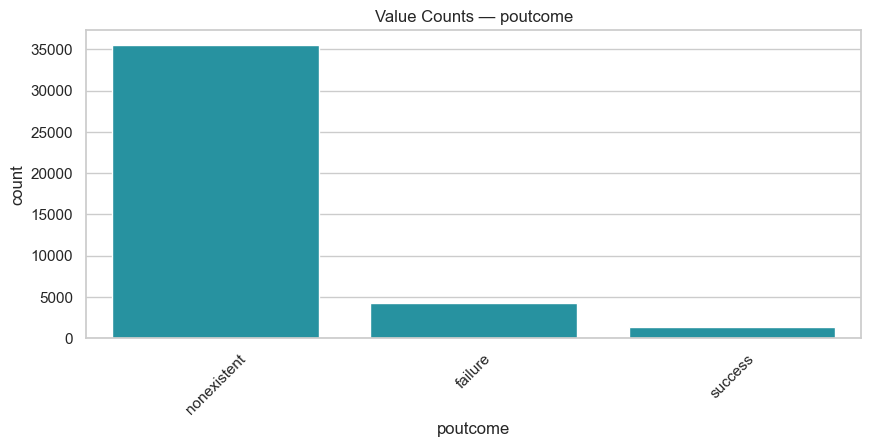

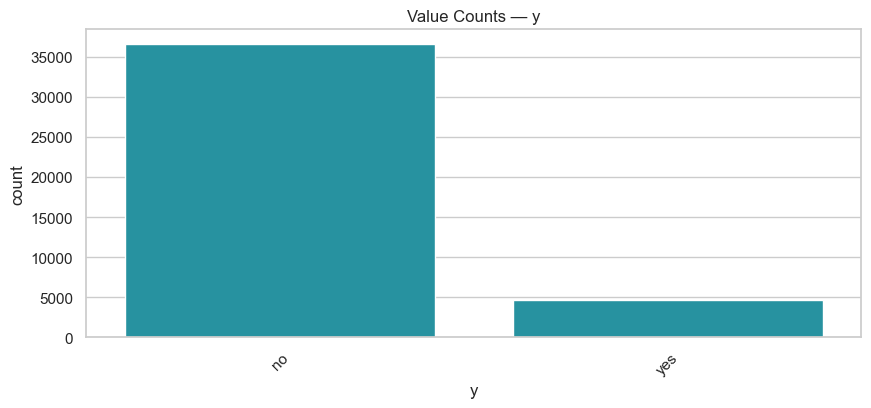

In [45]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index,
                  color=ACCENT_COLOR)
    plt.xticks(rotation=45)
    plt.title(f"Value Counts — {col}")

    plt.savefig(f"{FIG_DIR}{col}_value_counts.png", dpi=300, bbox_inches="tight")
    plt.show()

In [46]:
df["y_bin"] = df["y"].map({"yes":1, "no":0})

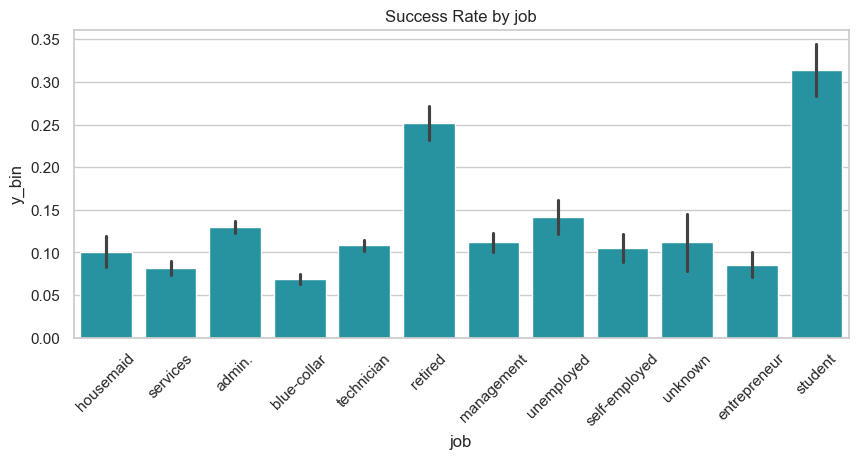

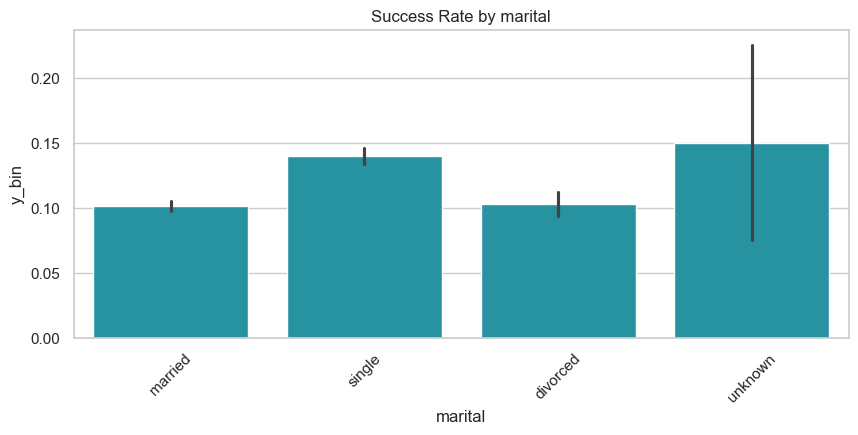

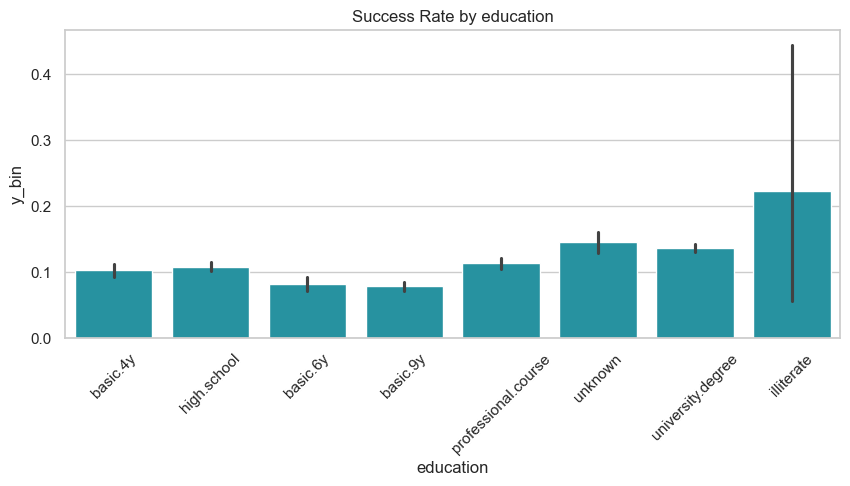

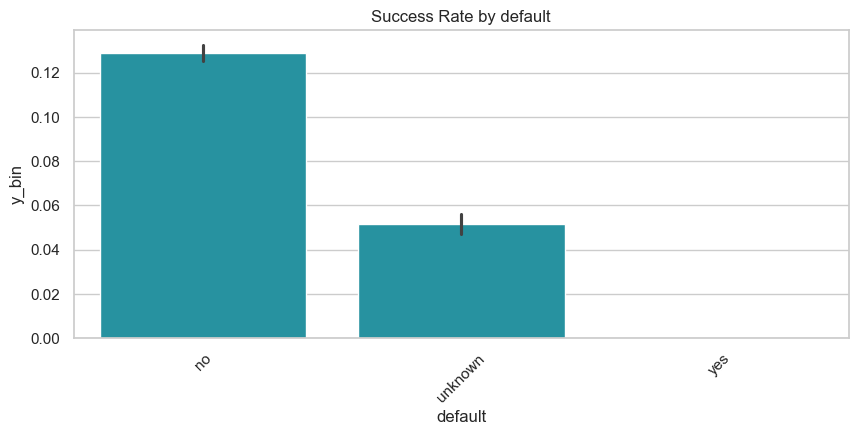

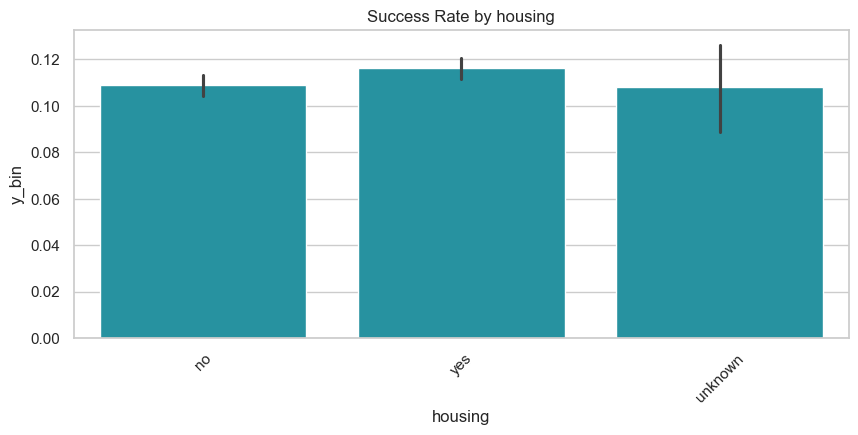

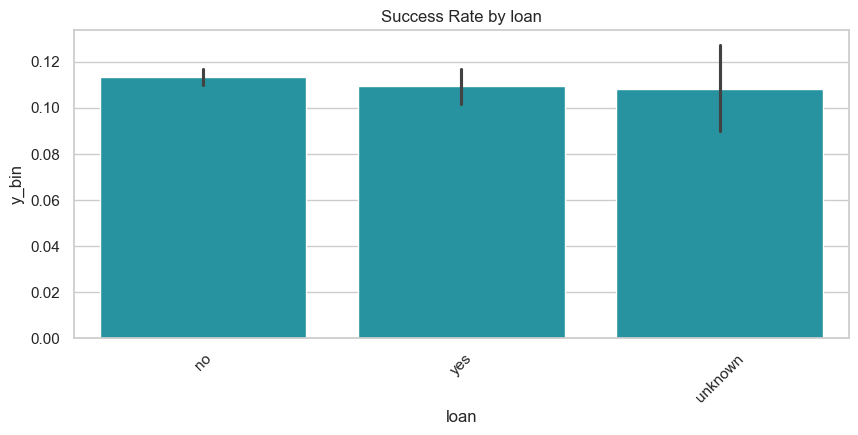

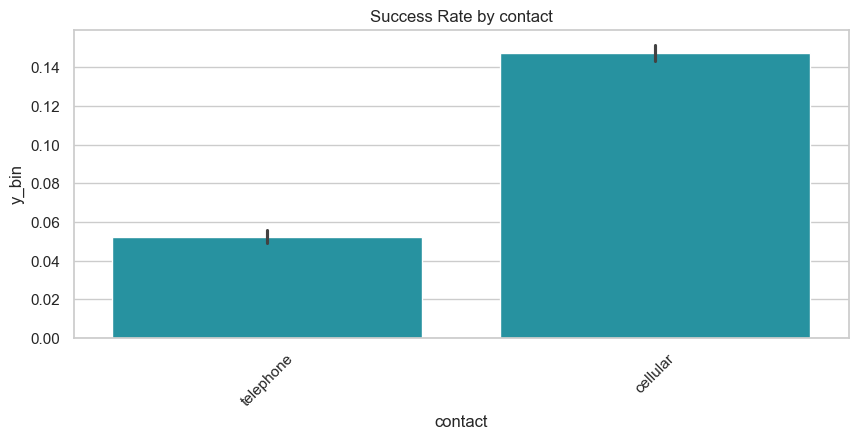

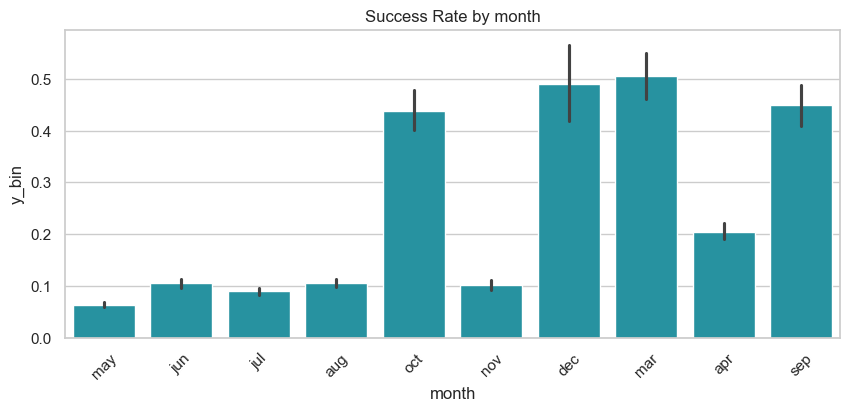

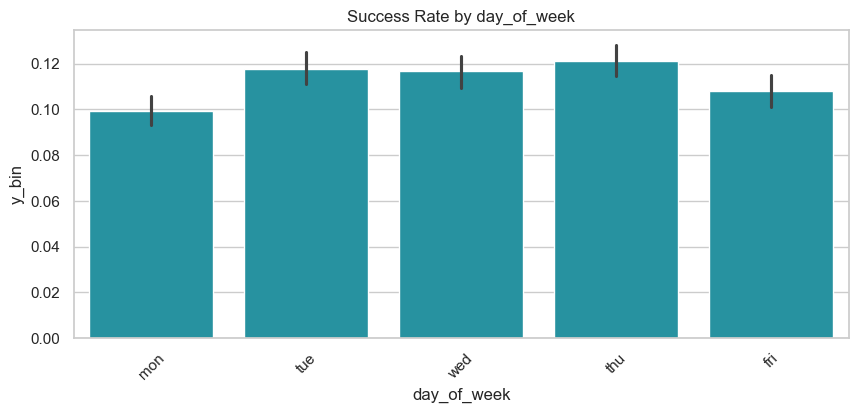

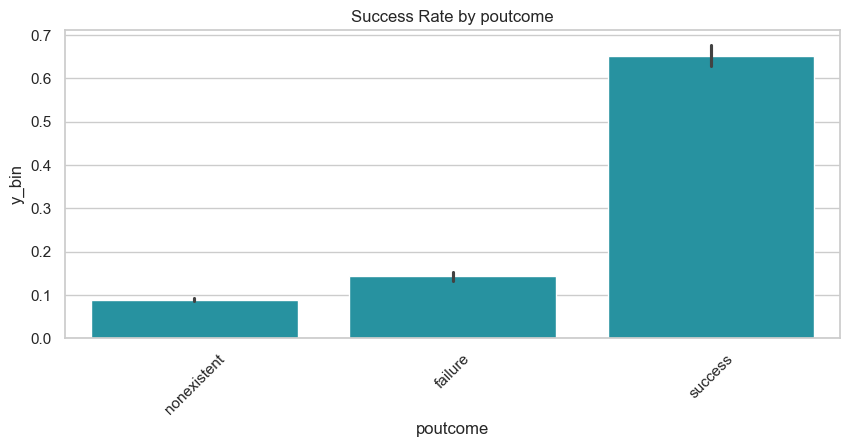

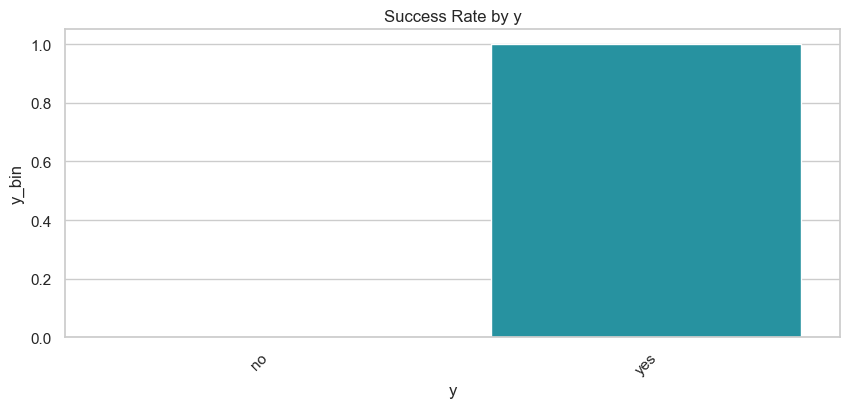

In [47]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(x=col, y="y_bin", data=df, color=ACCENT_COLOR)
    plt.xticks(rotation=45)
    plt.title(f"Success Rate by {col}")

    plt.savefig(f"{FIG_DIR}{col}_success_rate.png", dpi=300, bbox_inches="tight")
    plt.show()

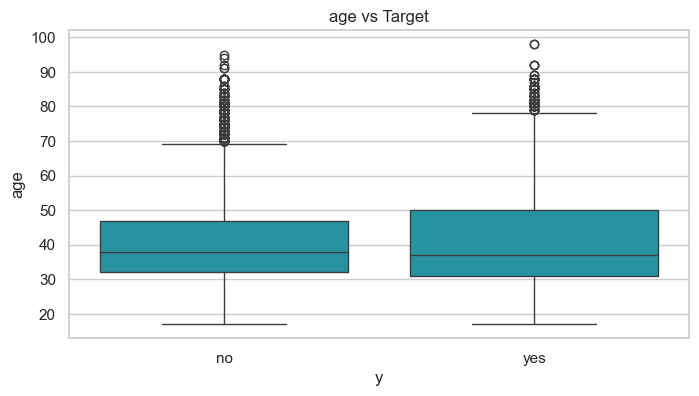

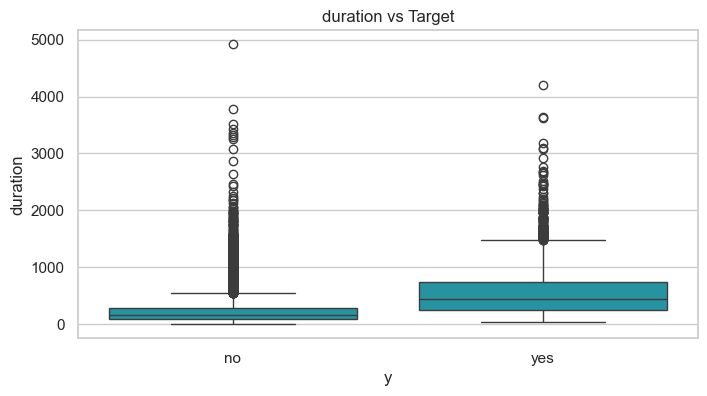

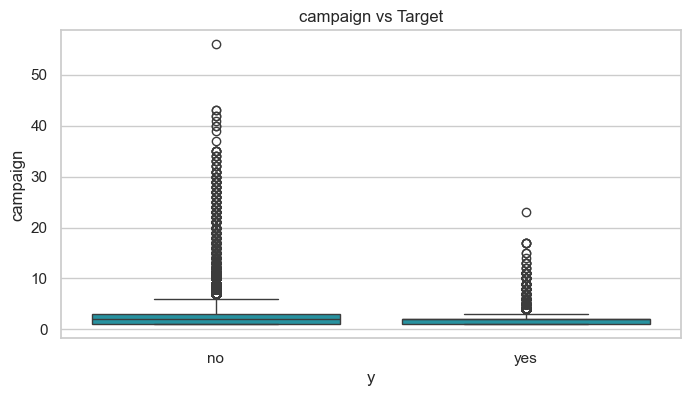

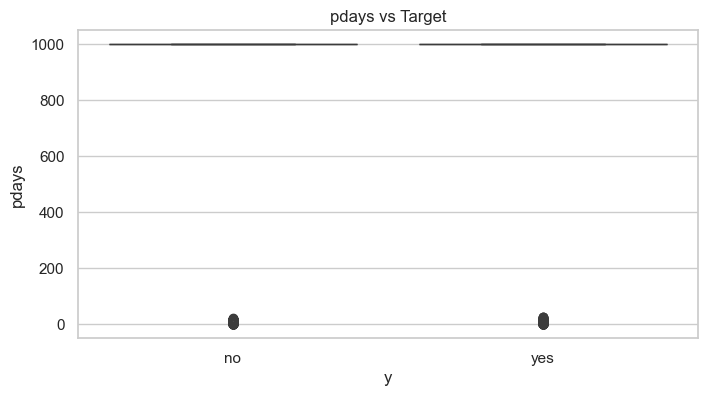

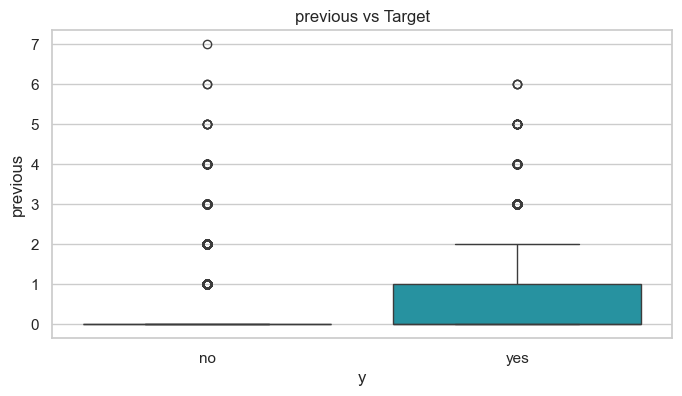

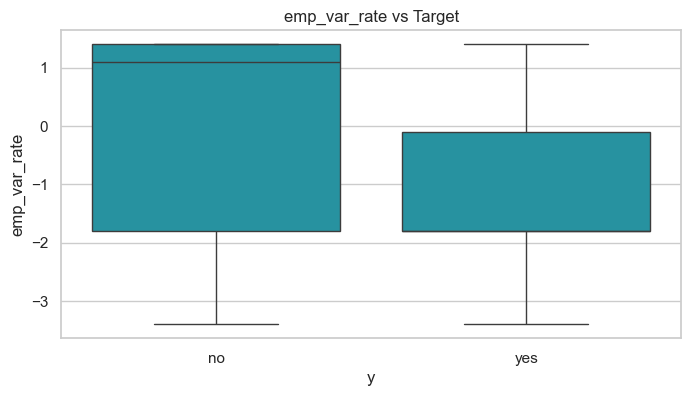

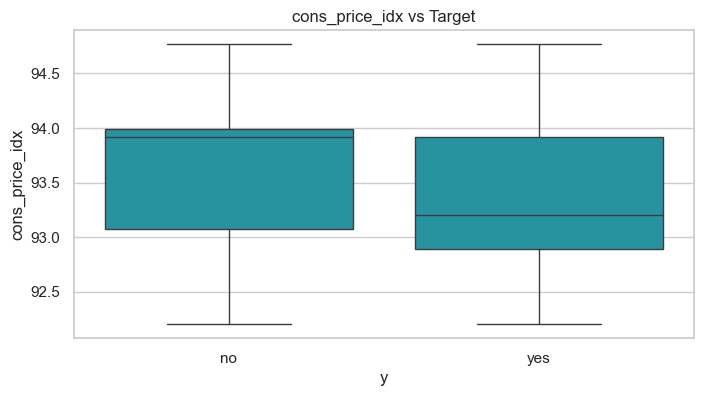

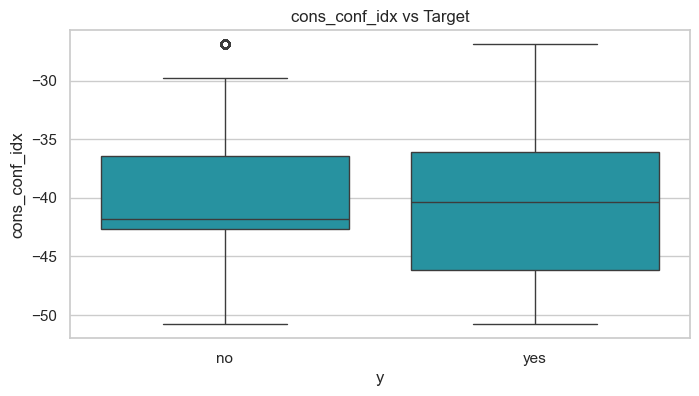

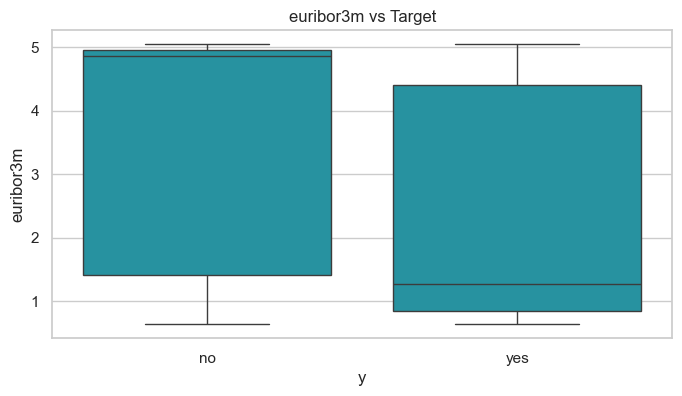

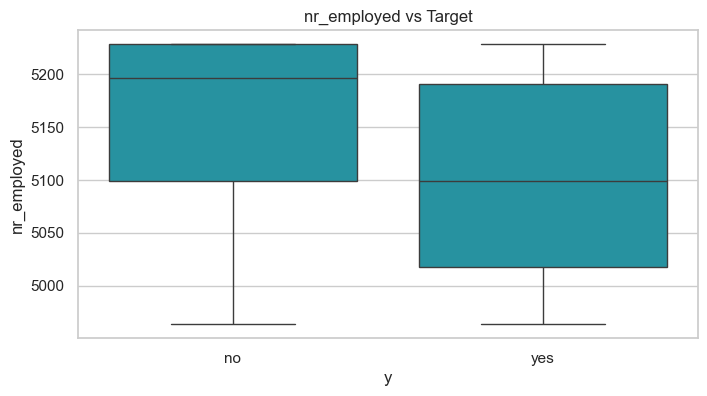

In [48]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x="y", y=col, color=ACCENT_COLOR)
    plt.title(f"{col} vs Target")

    plt.savefig(f"{FIG_DIR}{col}_vs_target.png", dpi=300, bbox_inches="tight")
    plt.show()

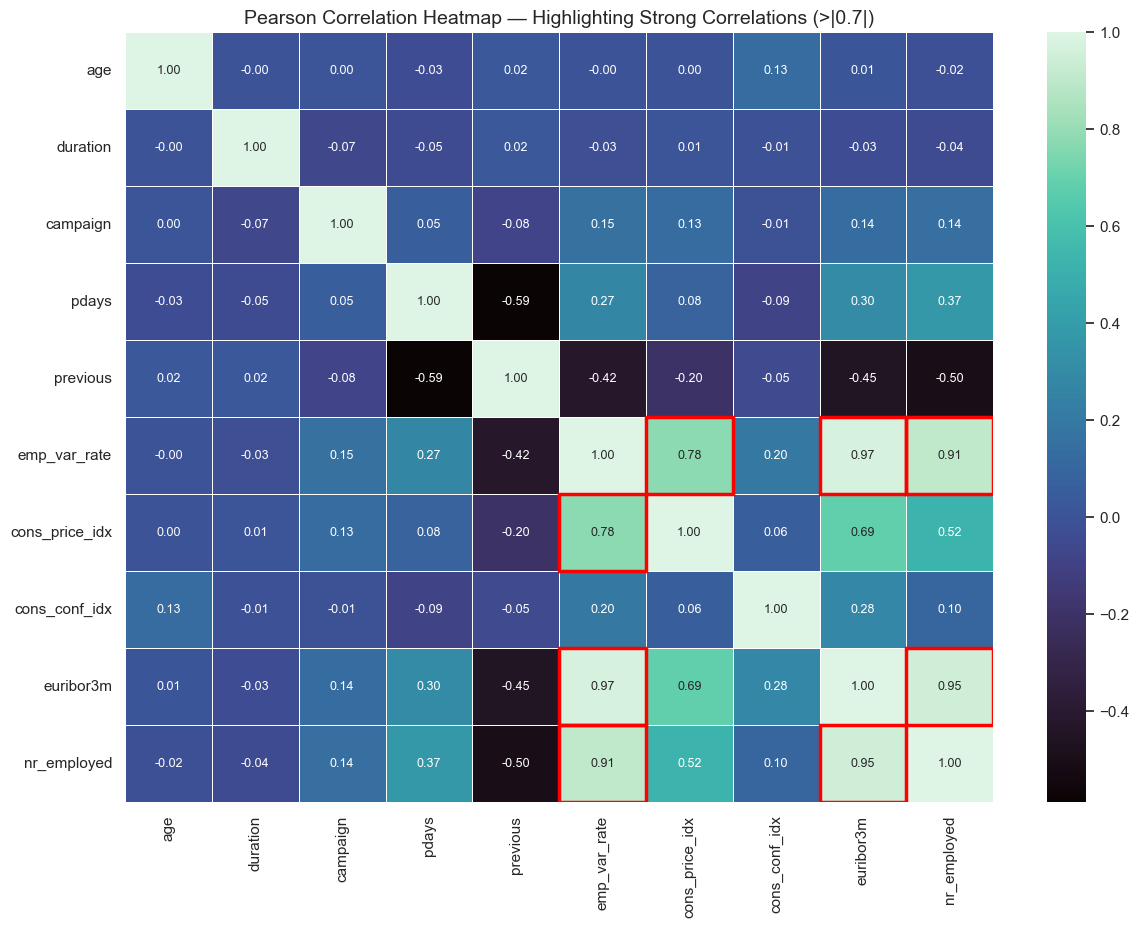

In [50]:
# --- Correlation Matrix ---
corr = df[num_cols].corr()

# --- Mask for highlighting strong correlations ---
# Highlight: |corr| > 0.7 AND corr != 1
highlight_mask = corr.abs() > 0.7
np.fill_diagonal(highlight_mask.values, False)   # prevent self-correlation highlight

plt.figure(figsize=(14,10))

# --- Base heatmap (mako palette) ---
sns.heatmap(
    corr,
    cmap="mako",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar=True,
    annot_kws={"size": 9}
)

# --- Overlay highlight boxes ---
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if highlight_mask.iloc[i, j]:
            plt.gca().add_patch(
                plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor="#ff0000",   # greenish-blue highlight
                    linewidth=2.5
                )
            )

plt.title("Pearson Correlation Heatmap — Highlighting Strong Correlations (>|0.7|)", fontsize=14)

plt.savefig(f"{FIG_DIR}correlation_heatmap_highlighted.png", dpi=300, bbox_inches="tight")
plt.show()


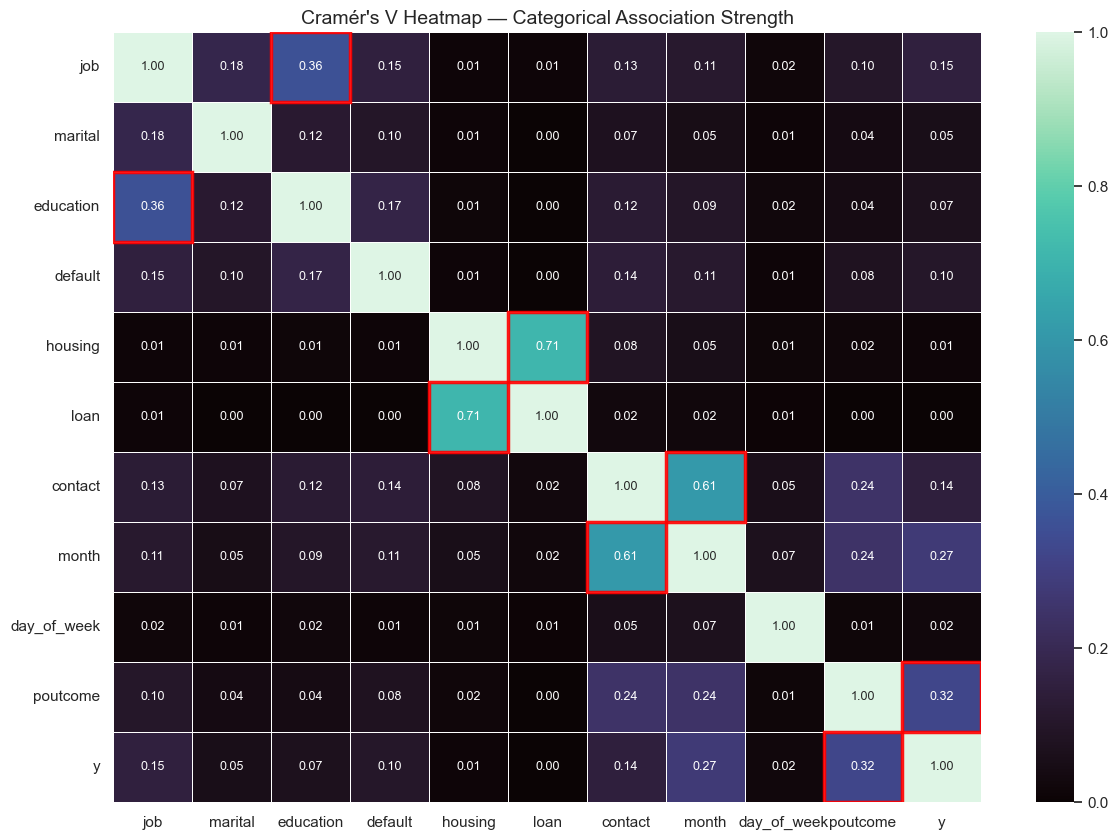

In [56]:
# --- Function to compute Cramér's V ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    r_corr = r - (r-1)**2/(n-1)
    k_corr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# --- Compute Cramér's V matrix ---
cat_corr = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols,
    columns=cat_cols
)

for col1 in cat_cols:
    for col2 in cat_cols:
        cat_corr.loc[col1, col2] = cramers_v(df[col1], df[col2])

# --- Mask for highlighting strong associations ---
highlight_mask = cat_corr.abs() > 0.30   # threshold for moderate association
np.fill_diagonal(highlight_mask.values, False)

plt.figure(figsize=(14,10))

# --- Base heatmap ---
sns.heatmap(
    cat_corr,
    cmap="mako",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar=True
)

# --- Add teal highlight box for strong associations ---
for i in range(cat_corr.shape[0]):
    for j in range(cat_corr.shape[1]):
        if highlight_mask.iloc[i, j]:
            plt.gca().add_patch(
                plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor="#ff0000ea",  # your greenish-blue highlight
                    linewidth=2.5
                )
            )

plt.title("Cramér's V Heatmap — Categorical Association Strength", fontsize=14)

plt.savefig(f"{FIG_DIR}categorical_cramersV_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [57]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 25, 40, 60, 100],
    labels=["Young", "Adult", "Middle Age", "Senior"]
)

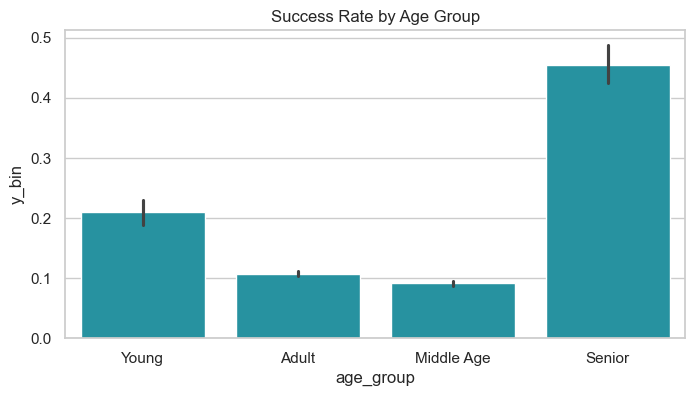

In [58]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="age_group", y="y_bin", color=ACCENT_COLOR)
plt.title("Success Rate by Age Group")

plt.savefig(f"{FIG_DIR}age_group_success_rate.png", dpi=300, bbox_inches="tight")
plt.show()

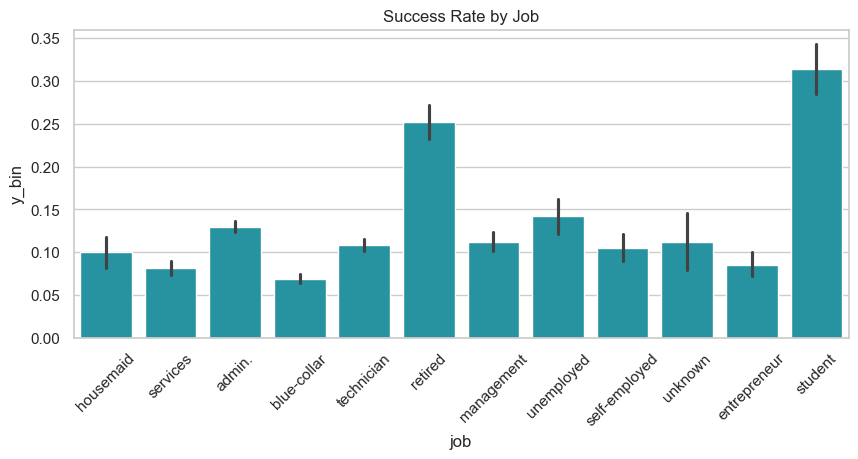

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="job", y="y_bin", color=ACCENT_COLOR)
plt.xticks(rotation=45)
plt.title("Success Rate by Job")

plt.savefig(f"{FIG_DIR}job_success_rate.png", dpi=300, bbox_inches="tight")
plt.show()


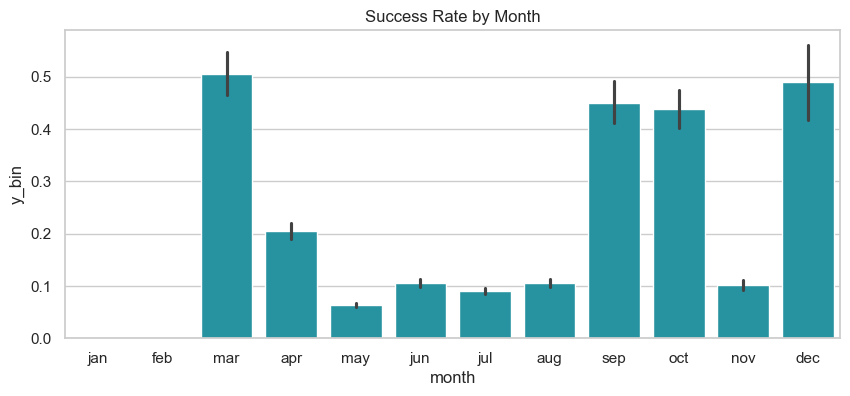

In [60]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=df, x="month", y="y_bin",
    order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],
    color=ACCENT_COLOR
)
plt.title("Success Rate by Month")

plt.savefig(f"{FIG_DIR}month_success_rate.png", dpi=300, bbox_inches="tight")
plt.show()

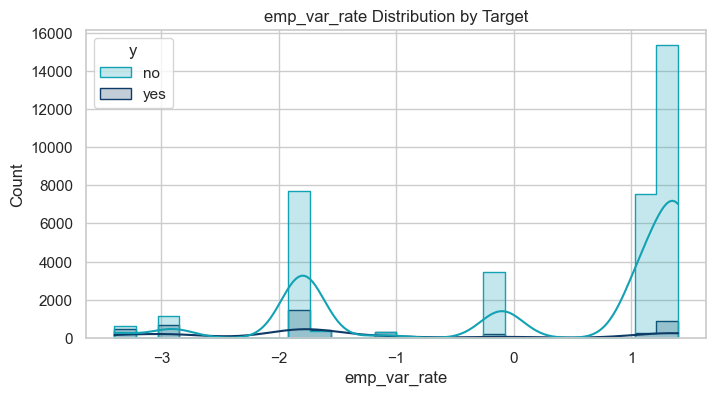

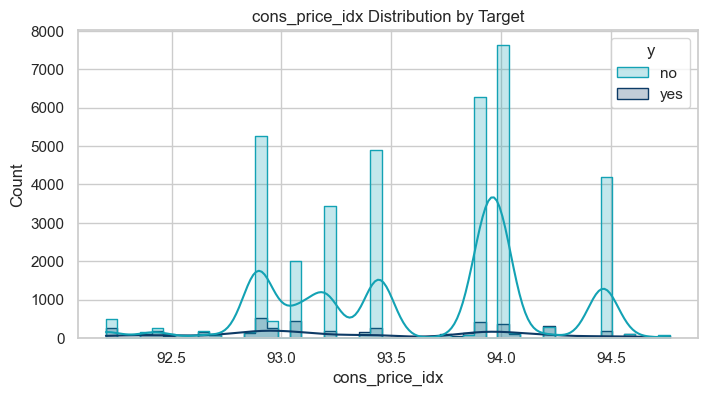

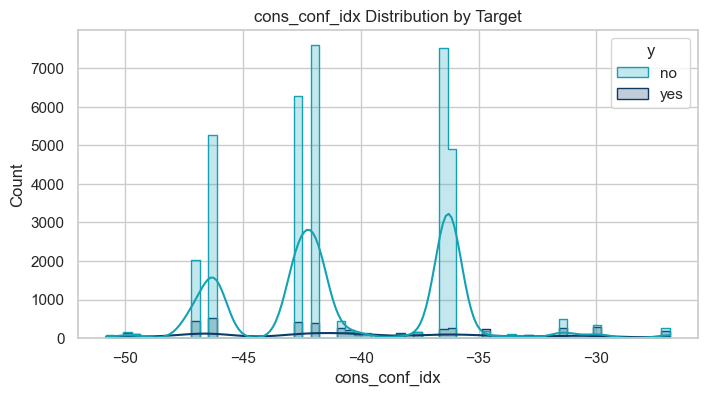

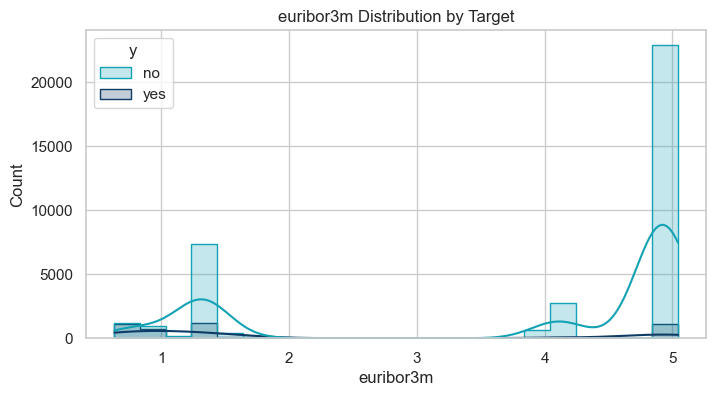

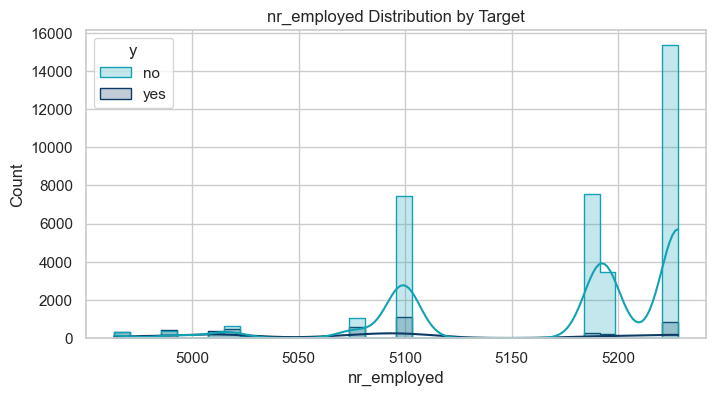

In [62]:
for col in ["emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed"]:
    plt.figure(figsize=(8,4))

    sns.histplot(
        data=df, x=col, hue="y",
        palette=[ACCENT_COLOR, "#0d3b66"],   # teal vs deep blue
        kde=True, element="step"
    )

    plt.title(f"{col} Distribution by Target")

    plt.savefig(f"{FIG_DIR}{col}_vs_target_dist.png", dpi=300, bbox_inches="tight")
    plt.show()


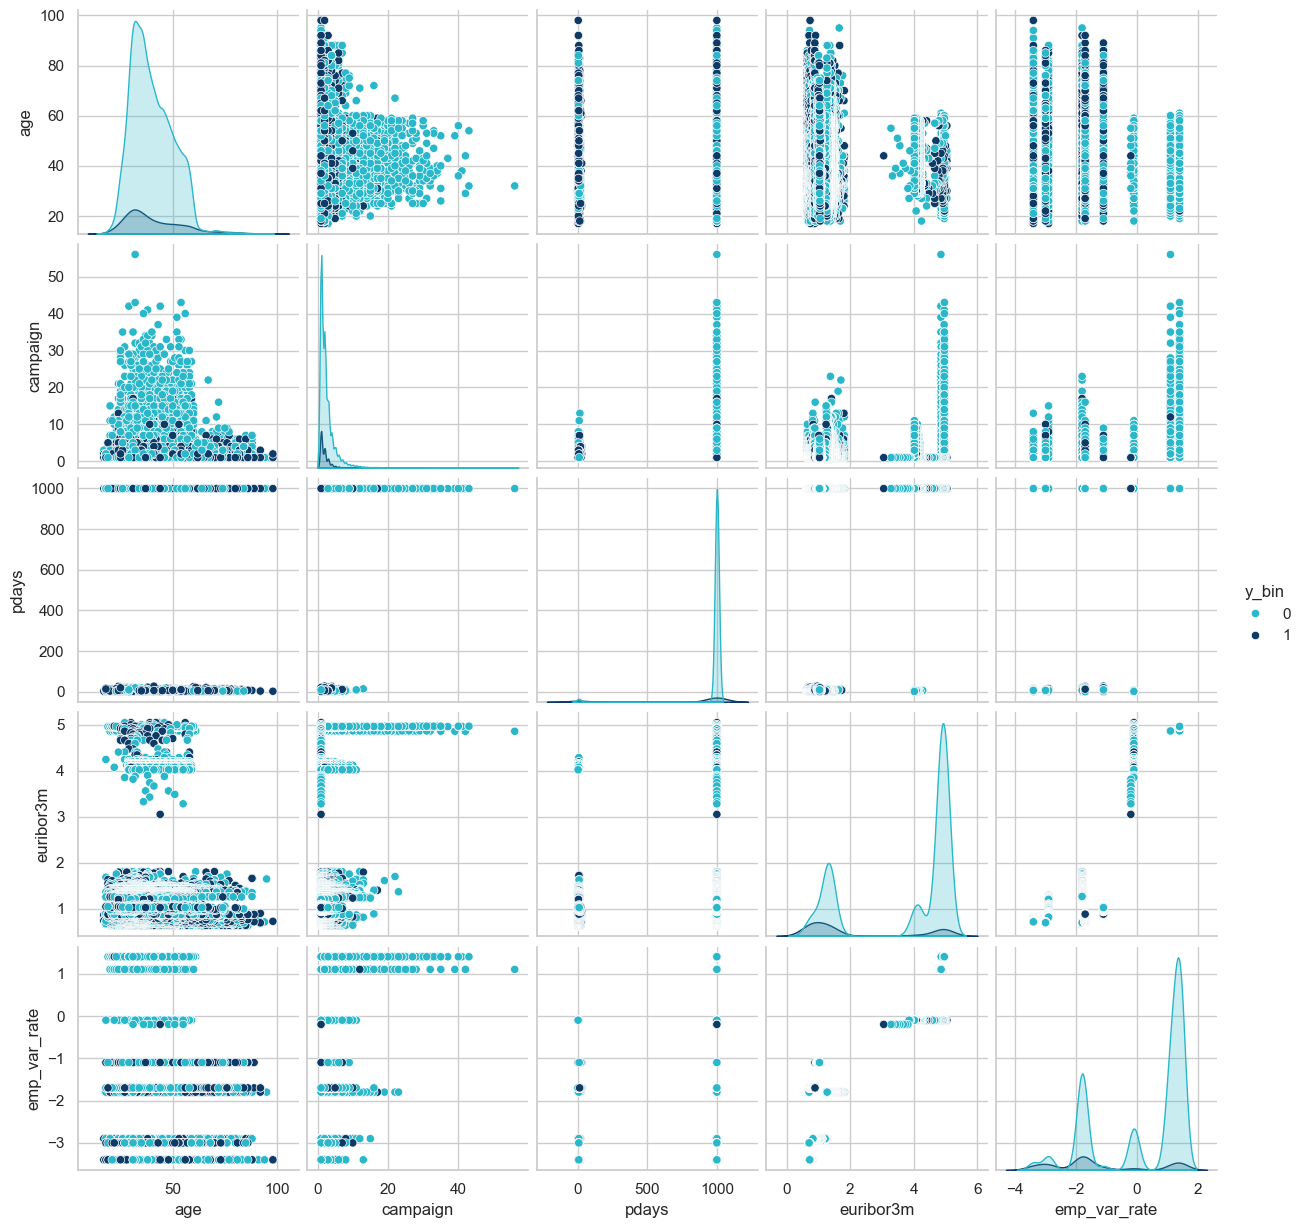

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="mako")
ACCENT_COLOR = "#2ab7ca"

# Convert target to numeric
df["y_bin"] = df["y"].map({"yes": 1, "no": 0})

# Choose key variables for pairplot
pairplot_cols = [
    "age",
    "campaign",
    "pdays",
    "euribor3m",
    "emp_var_rate",
    "y_bin"
]

# Pairplot with custom colors
sns.pairplot(
    df[pairplot_cols],
    hue="y_bin",
    palette={0: ACCENT_COLOR, 1: "#0d3b66"},
    diag_kind="kde",
    corner=False
)

plt.savefig(f"{FIG_DIR}pairplot_numeric.png", dpi=300, bbox_inches="tight")
plt.show()


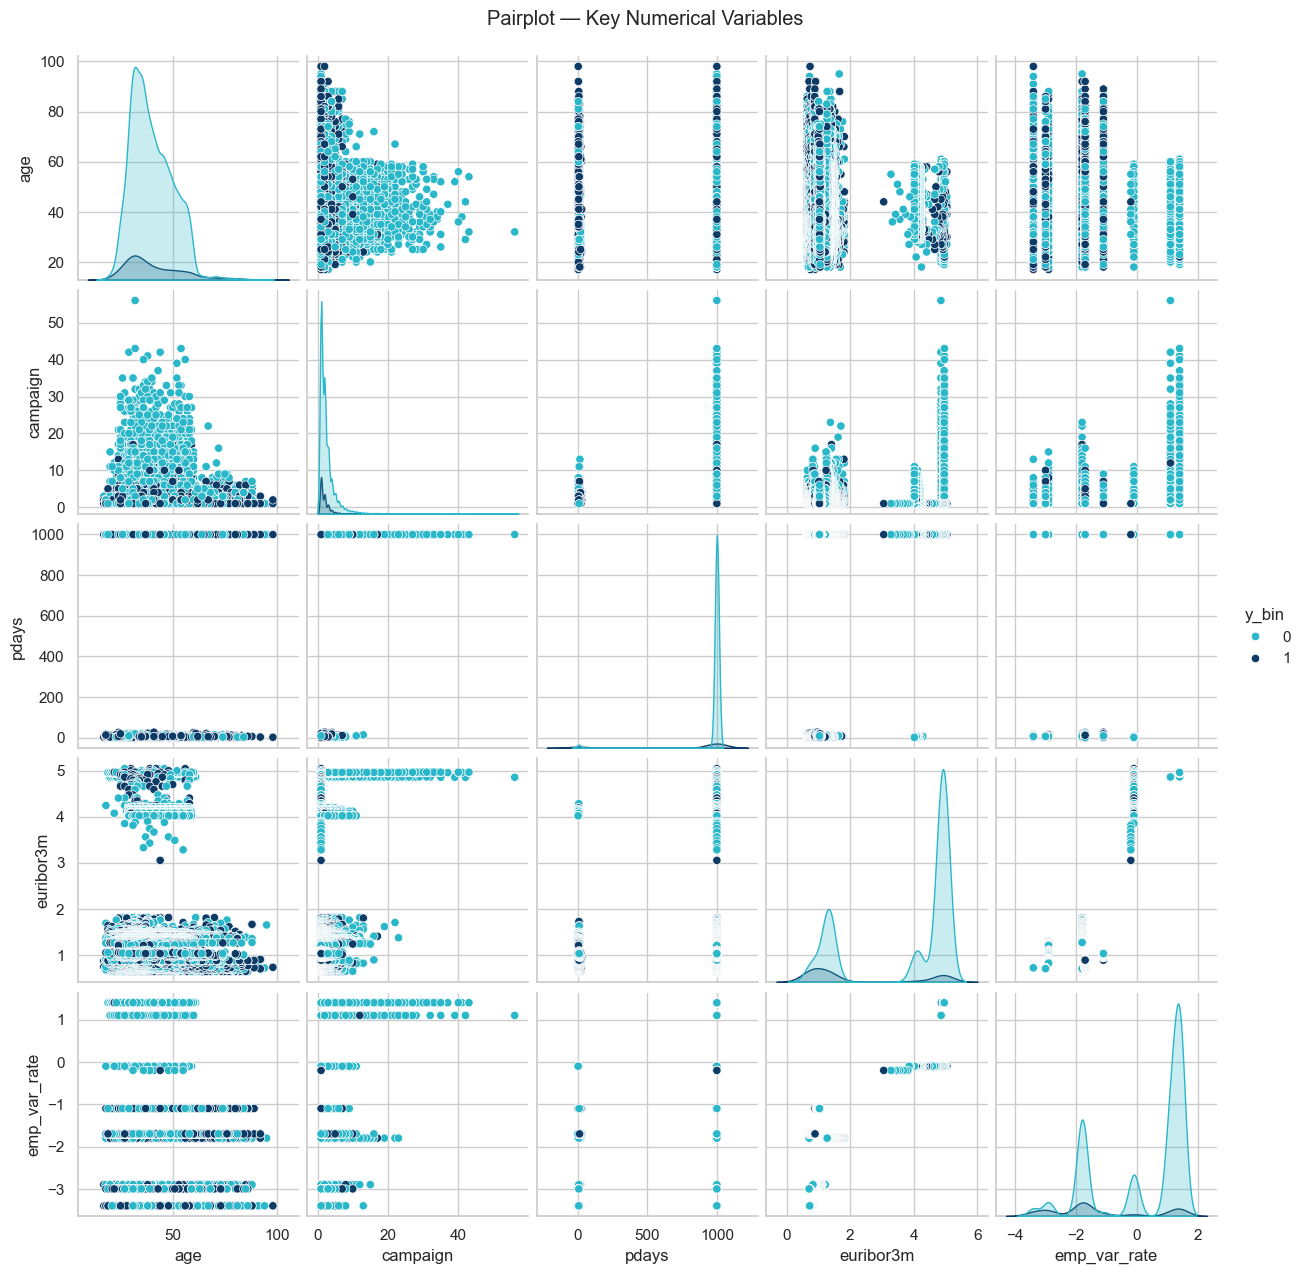

In [70]:
pairplot_cols = [
    "age",
    "campaign",
    "pdays",
    "euribor3m",
    "emp_var_rate",
    "y_bin"
]

g = sns.pairplot(
    df[pairplot_cols],
    hue="y_bin",
    palette={0: ACCENT_COLOR, 1: SECOND_COLOR},
    diag_kind="kde",
    corner=False
)

g.fig.suptitle("Pairplot — Key Numerical Variables", y=1.02)

plt.savefig(f"{FIG_DIR}pairplot_numeric.png", dpi=300, bbox_inches="tight")
plt.show()


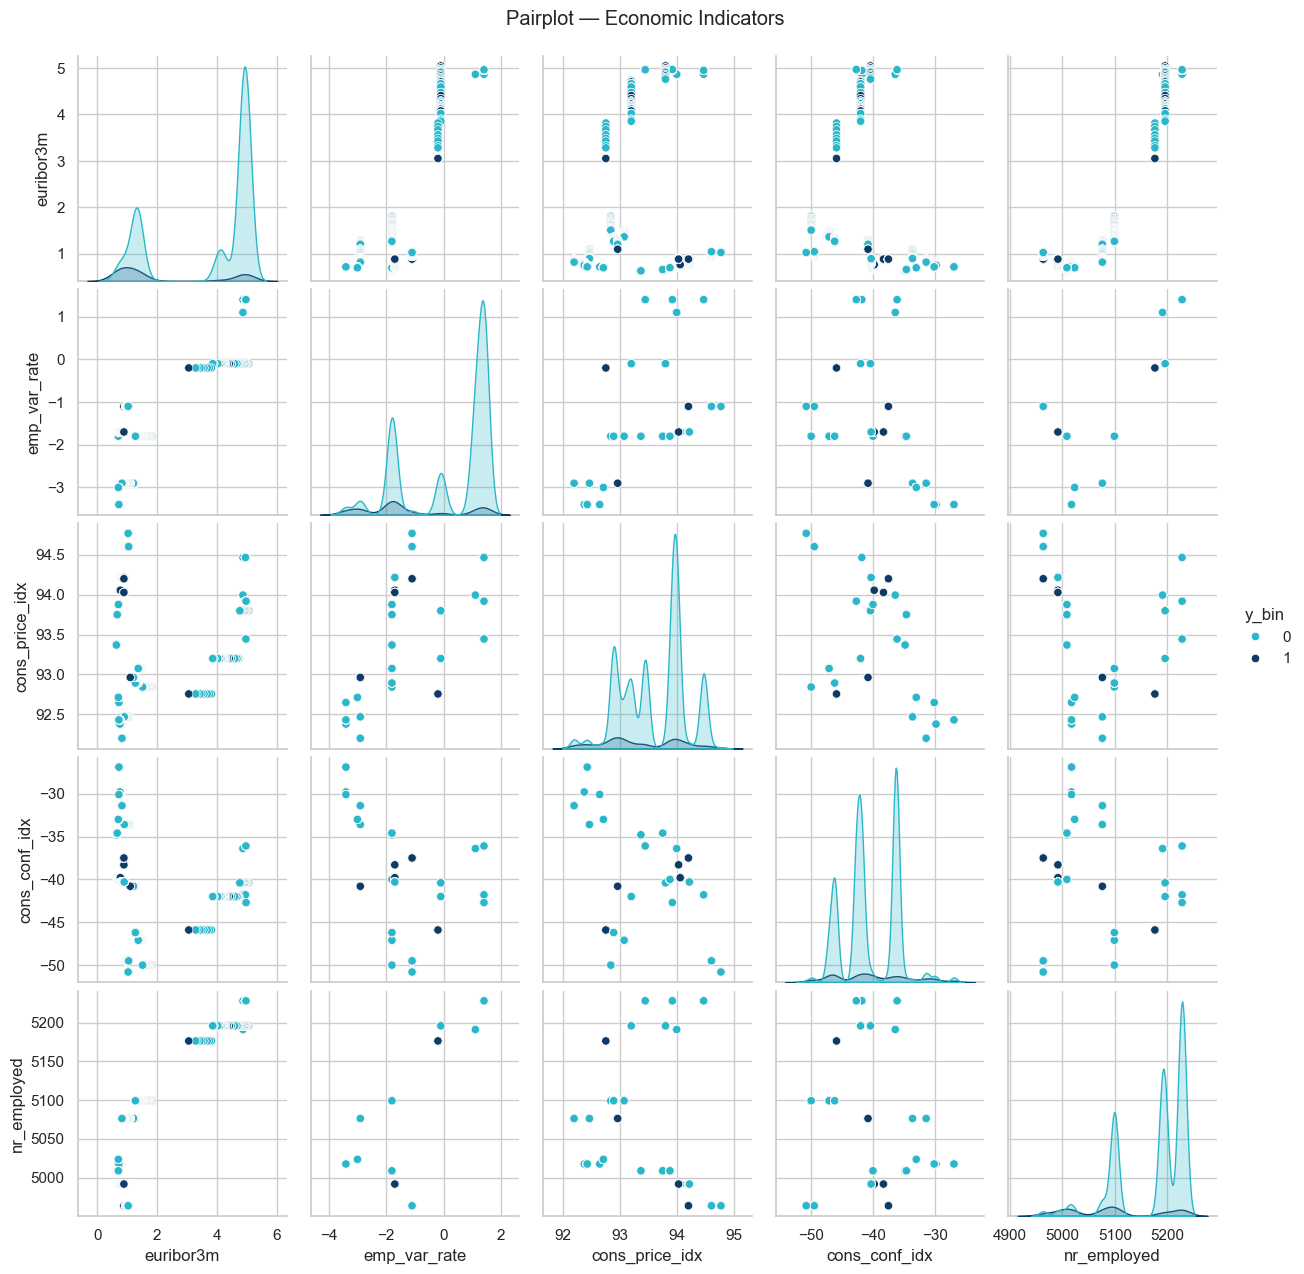

In [71]:
econ_cols = [
    "euribor3m",
    "emp_var_rate",
    "cons_price_idx",
    "cons_conf_idx",
    "nr_employed",
    "y_bin"
]

g = sns.pairplot(
    df[econ_cols],
    hue="y_bin",
    palette={0: ACCENT_COLOR, 1: SECOND_COLOR},
    diag_kind="kde",
    corner=False
)

g.fig.suptitle("Pairplot — Economic Indicators", y=1.02)

plt.savefig(f"{FIG_DIR}pairplot_economic.png", dpi=300, bbox_inches="tight")
plt.show()


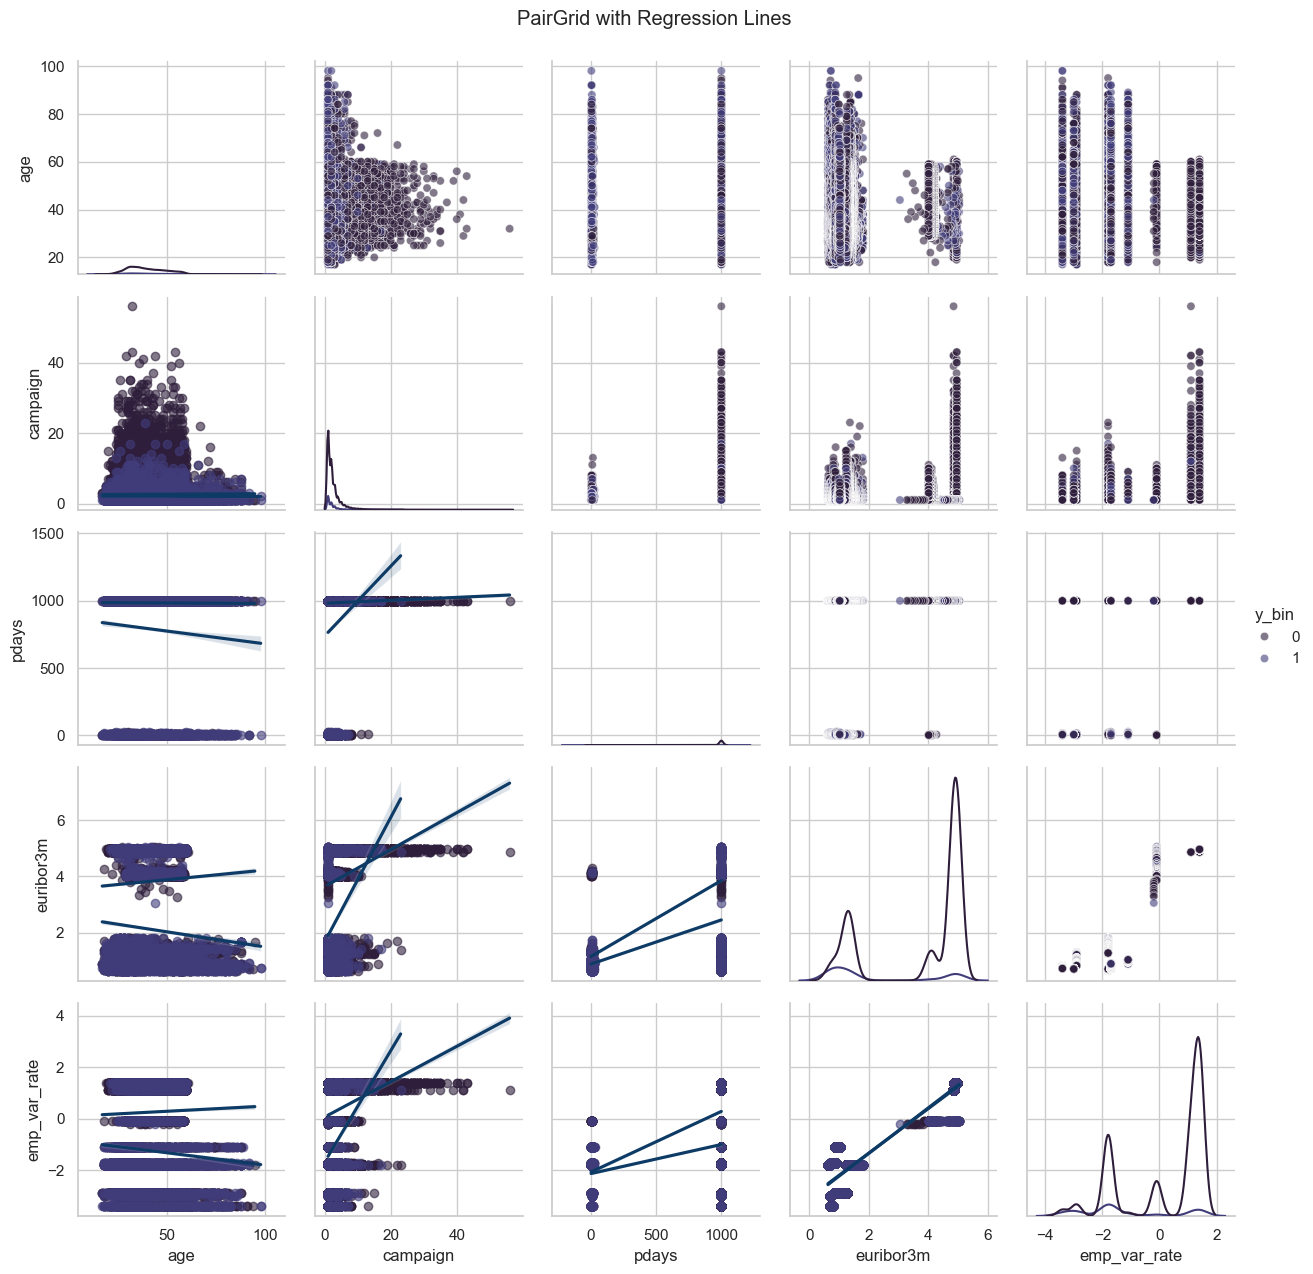

In [72]:
reg_cols = [
    "age",
    "campaign",
    "pdays",
    "euribor3m",
    "emp_var_rate"
]

g = sns.PairGrid(df[reg_cols + ["y_bin"]], hue="y_bin")
g.map_lower(sns.regplot,
            scatter_kws={"alpha": 0.6},
            line_kws={"color": SECOND_COLOR})
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot, alpha=0.6,
            palette={0: ACCENT_COLOR, 1: SECOND_COLOR})

g.add_legend()
g.fig.suptitle("PairGrid with Regression Lines", y=1.02)

plt.savefig(f"{FIG_DIR}pairgrid_regression.png", dpi=300, bbox_inches="tight")
plt.show()


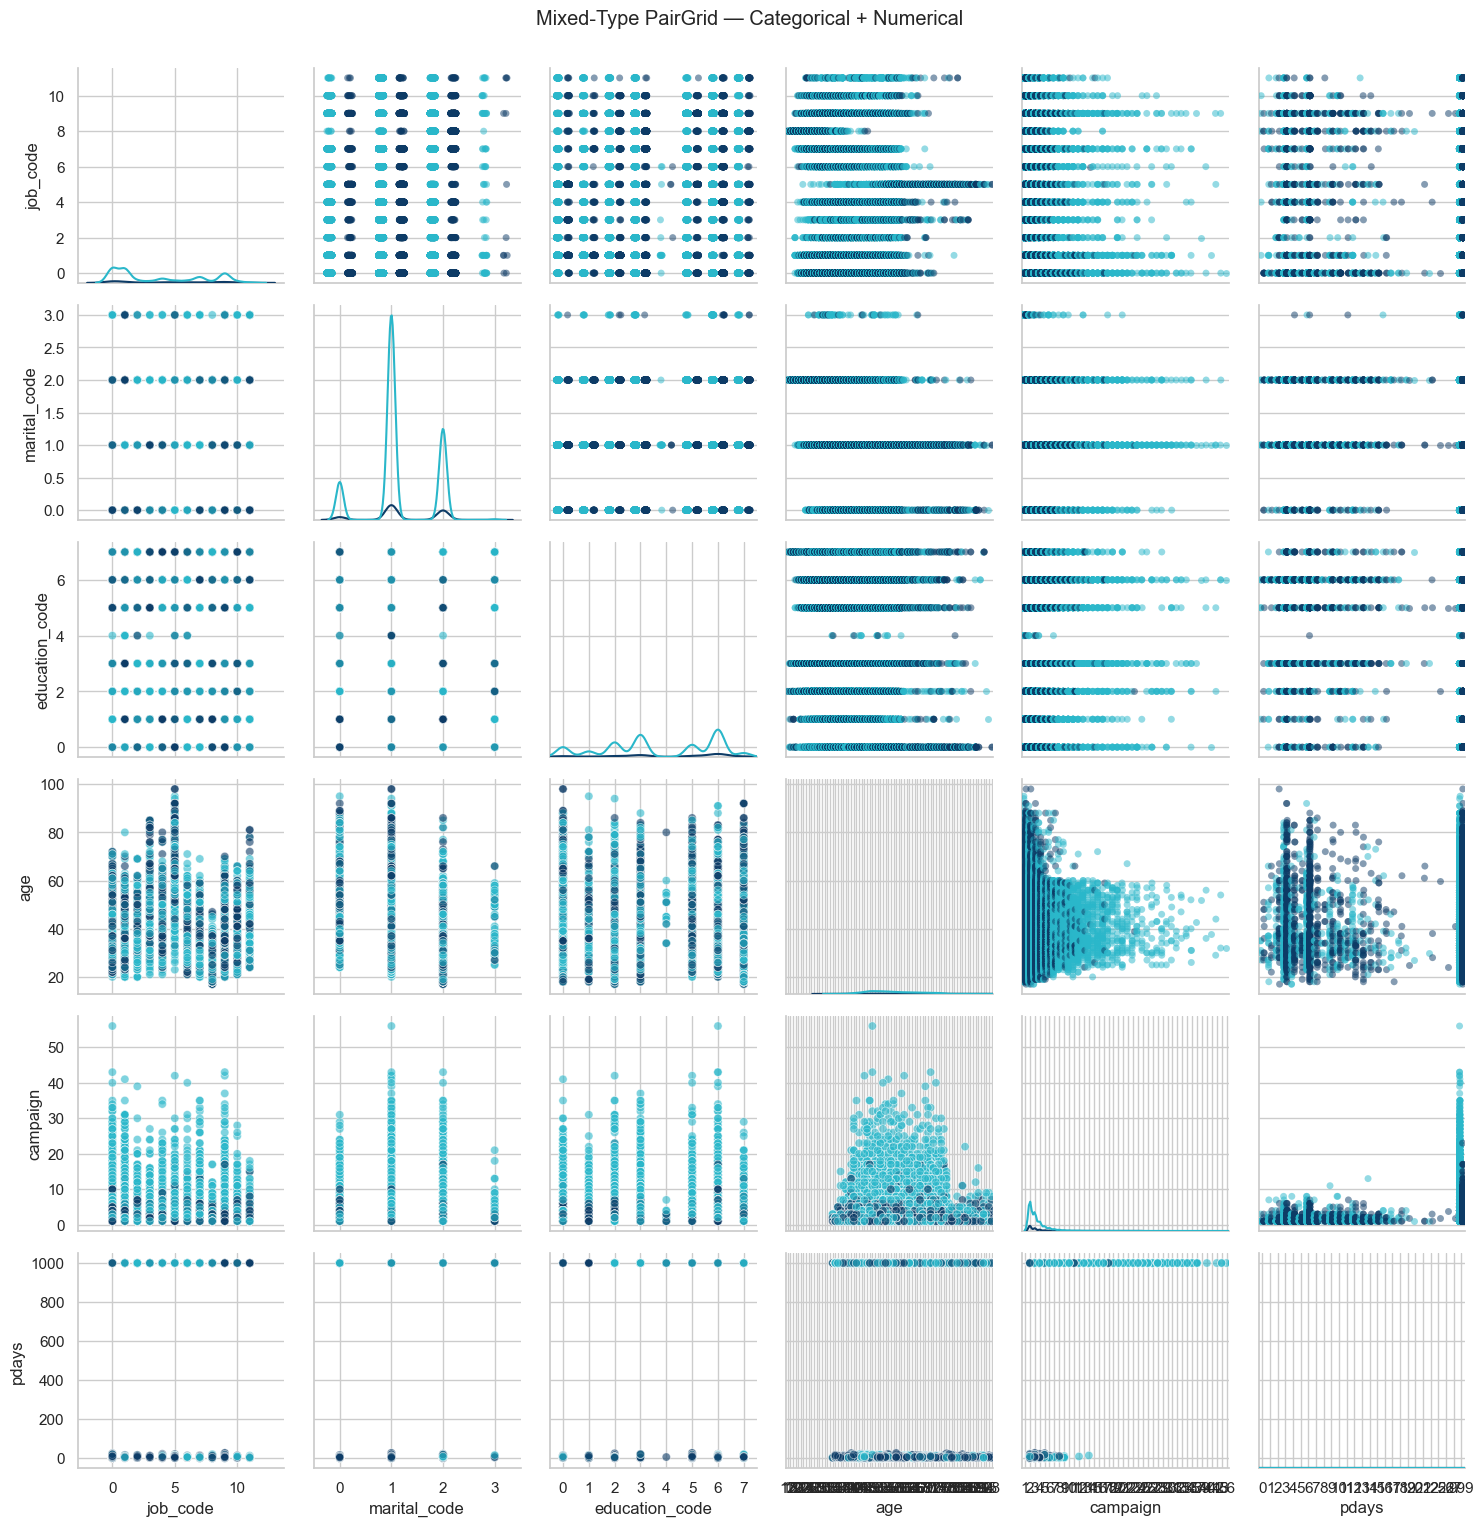

In [73]:
# Choose a subset of categorical + numeric features
cat_subset = ["job", "marital", "education"]
num_subset = ["age", "campaign", "pdays"]

# Encode categories to integers for plotting
df_coded = df.copy()
for col in cat_subset:
    df_coded[col + "_code"] = df_coded[col].astype("category").cat.codes

mix_cols = [col + "_code" for col in cat_subset] + num_subset

# Create PairGrid for all mixed variables
g = sns.PairGrid(df_coded[mix_cols + ["y_bin"]], hue="y_bin",
                 palette={0: ACCENT_COLOR, 1: SECOND_COLOR})

# Lower triangle: scatter plots for numeric pairs
g.map_lower(sns.scatterplot, alpha=0.6)

# Diagonal: KDE for all types
g.map_diag(sns.kdeplot)

# Upper triangle: strip plots for categorical–numeric & cat–cat
g.map_upper(sns.stripplot, dodge=True, alpha=0.5)

# Labels
g.fig.suptitle("Mixed-Type PairGrid — Categorical + Numerical", y=1.02)

plt.savefig(f"{FIG_DIR}pairgrid_mixed.png", dpi=300, bbox_inches="tight")
plt.show()

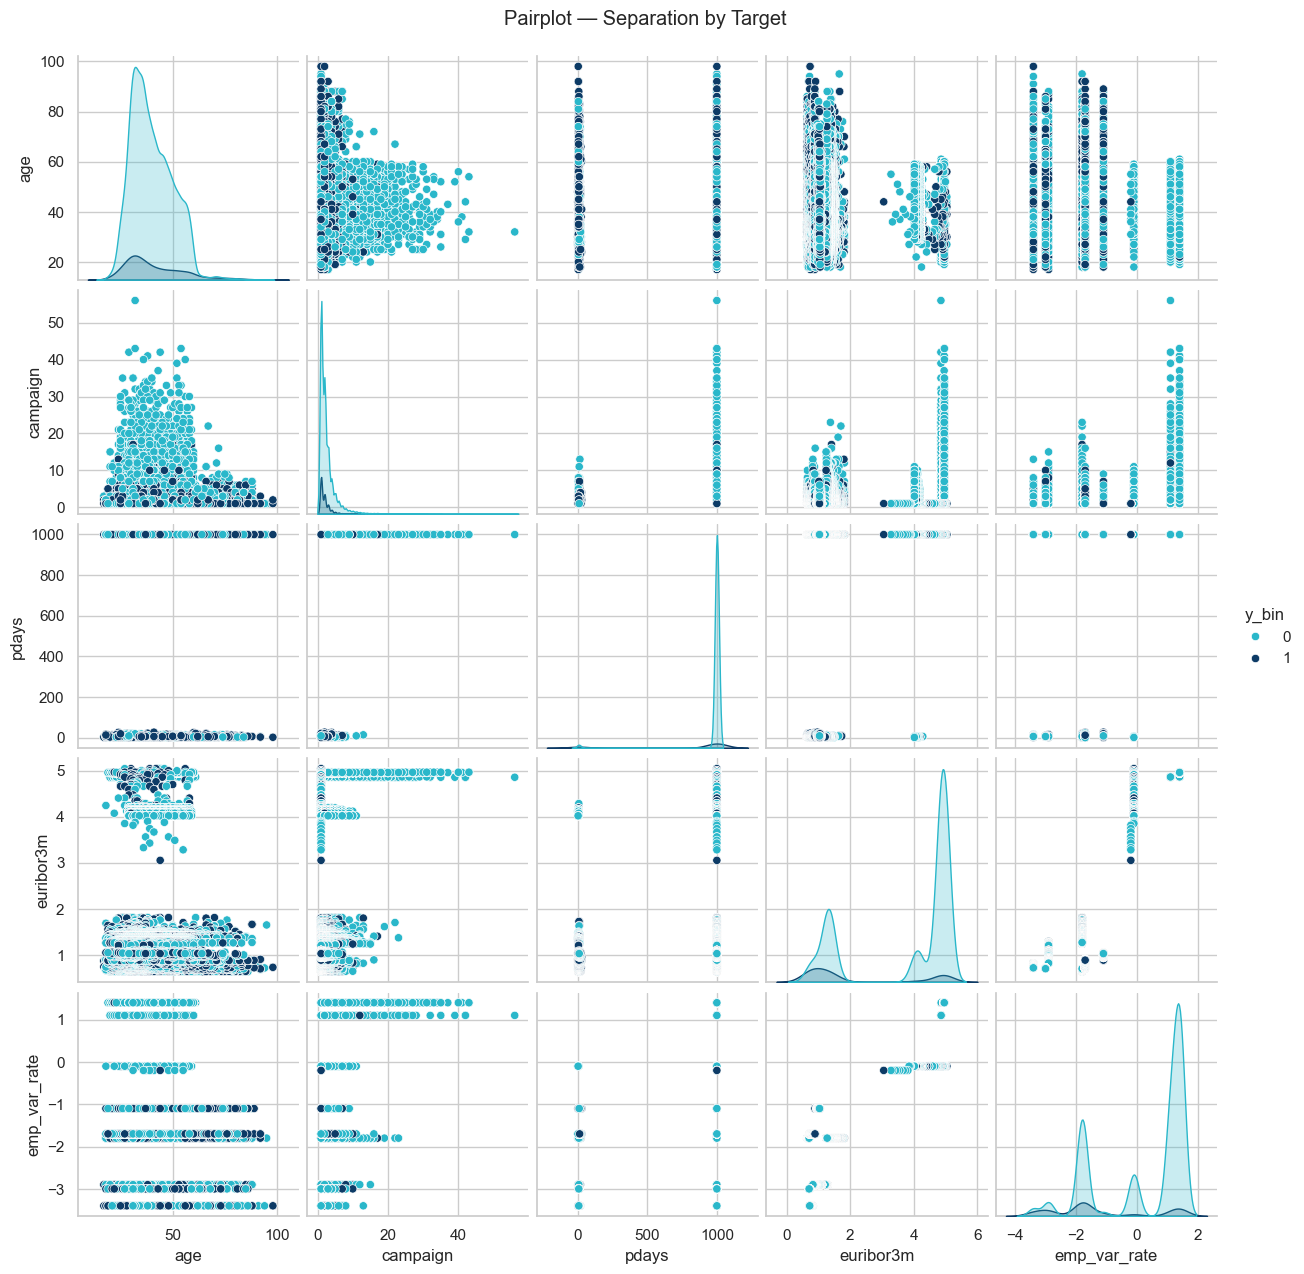

In [75]:
target_pairplot_cols = [
    "age", "campaign", "pdays", "euribor3m", "emp_var_rate"
]

g = sns.pairplot(
    df[target_pairplot_cols + ["y_bin"]],
    hue="y_bin",
    kind="scatter",
    palette={0: ACCENT_COLOR, 1: SECOND_COLOR},
    diag_kind="kde",
    corner=False
)

g.fig.suptitle("Pairplot — Separation by Target", y=1.02)

plt.savefig(f"{FIG_DIR}pairplot_target.png", dpi=300, bbox_inches="tight")
plt.show()
